<a href="https://colab.research.google.com/github/AishaniMajumder/InvoiceClassifier/blob/main/Copy_of_invoice_tcs_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.image as mpimg

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Images 1.zip"
extract_path = "/content/drive/MyDrive/extracted_images_sir"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Zip file extracted to: {extract_path}")

Zip file extracted to: /content/drive/MyDrive/extracted_images_sir


In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Path to your dataset directory (CHANGE this to match your dataset location)
dataset_dir = "/content/drive/MyDrive/Invoice_Reformed_DATA"

# Desired output zip file path (in Colab's local storage)
zip_output_path = "/content/Invoice_Reformed_DATA.zip"

# Zip the dataset directory
shutil.make_archive(base_name=zip_output_path.replace('.zip', ''), format='zip', root_dir=dataset_dir)

# Download the zipped dataset to your local device
from google.colab import files
files.download(zip_output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

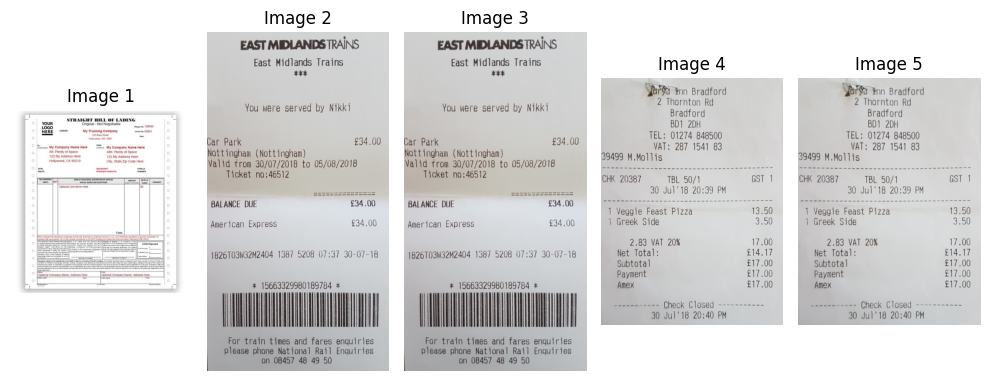

In [ ]:
image_dir = "/content/extracted_images/Images"
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
image_files.sort() # Sort the files to get consistent results

plt.figure(figsize=(10, 10))
for i in range(min(5, len(image_files))):
    img_path = os.path.join(image_dir, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [79.8 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,778 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,743 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Get:13 http://archive.ub

# Class Distribution

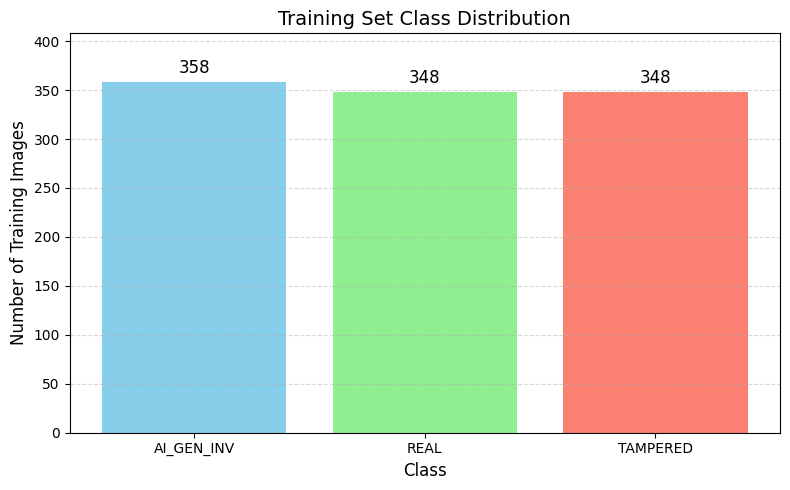

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the root directory of the dataset
dataset_root = '/content/drive/MyDrive/Invoice_Reformed_DATA/train'

# Initialize dictionary to store counts
class_counts = {}

# Loop through each class folder in the training directory
for class_name in ['AI_GEN_INV', 'REAL', 'TAMPERED']:
    class_train_path = os.path.join(dataset_root, class_name)
    if os.path.isdir(class_train_path):
        num_images = len([
            f for f in os.listdir(class_train_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
        ])
        class_counts[class_name] = num_images
    else:
        print(f"Training directory not found for class: {class_name}")

# Sort class names for consistent plotting
class_names = list(class_counts.keys())
image_counts = [class_counts[name] for name in class_names]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(class_names, image_counts, color=['skyblue', 'lightgreen', 'salmon'])

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height}', ha='center', va='bottom', fontsize=12)

plt.title('Training Set Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Training Images', fontsize=12)
plt.ylim(0, max(image_counts) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Augmentation for removing class imbalance

In [ ]:
# Augmentation script to balance AI_GEN_INV and TAMPERED classes to 348 training images each

import os
import random
from PIL import Image
from torchvision import transforms

# --- CONFIGURATION ---

# Root folder containing your class subfolders
TRAIN_ROOT = '/content/drive/MyDrive/INVOICE_DATASET_FINAL'

# Classes to augment
CLASSES_TO_AUGMENT = ['AI_GEN_INV', 'TAMPERED']

# Desired number of training images per class
TARGET_COUNT = 348

# Define your augmentation pipeline
AUGMENTATIONS = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15, expand=True),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    )
])

# Fix random seed for reproducibility
random.seed(42)

# --- AUGMENTATION LOOP ---

for cls in CLASSES_TO_AUGMENT:
    class_train_dir = os.path.join(TRAIN_ROOT, cls, 'train')
    if not os.path.isdir(class_train_dir):
        print(f"[Warning] Directory not found: {class_train_dir}")
        continue

    # List all existing image files
    existing_files = [
        f for f in os.listdir(class_train_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
    ]
    n_existing = len(existing_files)
    n_needed = TARGET_COUNT - n_existing

    if n_needed <= 0:
        print(f"{cls}: {n_existing} images (≥ {TARGET_COUNT}), skipping augmentation.")
        continue

    print(f"{cls}: {n_existing} images found, augmenting {n_needed} more...")

    # Generate and save augmented images
    for i in range(n_needed):
        orig_fname = random.choice(existing_files)
        orig_path = os.path.join(class_train_dir, orig_fname)

        # Open and augment
        img = Image.open(orig_path).convert('RGB')
        aug_img = AUGMENTATIONS(img)

        # Build output filename
        name, ext = os.path.splitext(orig_fname)
        out_fname = f"aug_{name}_{i}{ext}"
        out_path = os.path.join(class_train_dir, out_fname)

        # Save augmented image
        aug_img.save(out_path, quality=95)

    total_after = len([
        f for f in os.listdir(class_train_dir)
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
    ])
    print(f"{cls}: augmentation complete → now {total_after} images.\n")

print("✅ Augmentation finished. All classes should now have at least 348 training images.")


AI_GEN_INV: 279 images found, augmenting 69 more...
AI_GEN_INV: augmentation complete → now 348 images.

TAMPERED: 240 images found, augmenting 108 more...
TAMPERED: augmentation complete → now 348 images.

✅ Augmentation finished. All classes should now have at least 348 training images.


# Tathagata -- Training for classification of Invoices -- Real invoice, AI Generated invoice or Tampered Invoice

In [ ]:
import torch
import gc

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using device: {device}")
    print(f"GPU: {torch.cuda.get_device_name(device)}")
    print("-" * 50)

    # Get initial GPU memory statistics
    initial_allocated = torch.cuda.memory_allocated(device)
    initial_cached = torch.cuda.memory_reserved(device)

    print(f"Initial allocated memory: {initial_allocated / 1024**2:.2f} MB")
    print(f"Initial cached/reserved memory: {initial_cached / 1024**2:.2f} MB")
    print(f"Total initial GPU memory usage: {(initial_allocated + initial_cached) / 1024**2:.2f} MB")

    # Create some tensors to demonstrate cache usage
    print("\nCreating tensors to build up cache...")
    tensors = []
    for i in range(5):
        tensor = torch.randn(1000, 1000, device=device)
        tensors.append(tensor)

    # Check memory after creating tensors
    after_tensors_allocated = torch.cuda.memory_allocated(device)
    after_tensors_cached = torch.cuda.memory_reserved(device)

    print(f"After creating tensors - allocated: {after_tensors_allocated / 1024**2:.2f} MB")
    print(f"After creating tensors - cached: {after_tensors_cached / 1024**2:.2f} MB")

    # Delete tensors (this frees allocated memory but cache remains)
    del tensors
    gc.collect()  # Python garbage collection

    after_del_allocated = torch.cuda.memory_allocated(device)
    after_del_cached = torch.cuda.memory_reserved(device)

    print(f"\nAfter deleting tensors - allocated: {after_del_allocated / 1024**2:.2f} MB")
    print(f"After deleting tensors - cached: {after_del_cached / 1024**2:.2f} MB")
    print("Notice: Allocated memory decreased, but cached memory remains high")

    print("\n" + "="*50)
    print("CLEARING GPU MEMORY CACHE...")
    print("="*50)

    # Clear GPU memory cache - this actually clears the cache
    torch.cuda.empty_cache()

    # Get GPU memory statistics after clearing cache
    final_allocated = torch.cuda.memory_allocated(device)
    final_cached = torch.cuda.memory_reserved(device)

    print(f"After clearing cache - allocated: {final_allocated / 1024**2:.2f} MB")
    print(f"After clearing cache - cached: {final_cached / 1024**2:.2f} MB")

    # Calculate memory freed
    cache_freed = after_del_cached - final_cached
    print(f"\nCache memory freed: {cache_freed / 1024**2:.2f} MB")

    # Show memory summary
    print(f"\nMemory Summary:")
    print(f"  Peak cached memory: {after_tensors_cached / 1024**2:.2f} MB")
    print(f"  Final cached memory: {final_cached / 1024**2:.2f} MB")
    print(f"  Cache reduction: {((after_tensors_cached - final_cached) / after_tensors_cached * 100):.1f}%")

    # Additional memory info
    print(f"\nGPU Memory Info:")
    print(f"  Total GPU memory: {torch.cuda.get_device_properties(device).total_memory / 1024**2:.2f} MB")
    print(f"  Currently allocated: {torch.cuda.memory_allocated(device) / 1024**2:.2f} MB")
    print(f"  Currently cached: {torch.cuda.memory_reserved(device) / 1024**2:.2f} MB")

else:
    print("CUDA is not available. Cannot clear GPU memory cache.")
    print("Please ensure you have:")
    print("1. A CUDA-compatible GPU")
    print("2. CUDA drivers installed")
    print("3. PyTorch with CUDA support installed")

Using device: cuda
GPU: Tesla T4
--------------------------------------------------
Initial allocated memory: 2453.94 MB
Initial cached/reserved memory: 3418.00 MB
Total initial GPU memory usage: 5871.94 MB

Creating tensors to build up cache...
After creating tensors - allocated: 2473.63 MB
After creating tensors - cached: 3418.00 MB

After deleting tensors - allocated: 2453.94 MB
After deleting tensors - cached: 3418.00 MB
Notice: Allocated memory decreased, but cached memory remains high

CLEARING GPU MEMORY CACHE...
After clearing cache - allocated: 2453.94 MB
After clearing cache - cached: 3418.00 MB

Cache memory freed: 0.00 MB

Memory Summary:
  Peak cached memory: 3418.00 MB
  Final cached memory: 3418.00 MB
  Cache reduction: 0.0%

GPU Memory Info:
  Total GPU memory: 15095.06 MB
  Currently allocated: 2453.94 MB
  Currently cached: 3418.00 MB


# EfficentNet



=== Epoch 1/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


Train Loss: 2.4960 | Train Acc: 0.4630
 Val  Loss: 1.8405 |  Val Acc: 0.5047
✔️  New best (Val Acc: 0.5047) saved

=== Epoch 2/50 ===


Val  : 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Train Loss: 1.4967 | Train Acc: 0.6518
 Val  Loss: 2.2020 |  Val Acc: 0.4579

=== Epoch 3/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


Train Loss: 1.1039 | Train Acc: 0.7619
 Val  Loss: 1.2463 |  Val Acc: 0.6355
✔️  New best (Val Acc: 0.6355) saved

=== Epoch 4/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


Train Loss: 0.8567 | Train Acc: 0.7970
 Val  Loss: 0.9458 |  Val Acc: 0.6729
✔️  New best (Val Acc: 0.6729) saved

=== Epoch 5/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


Train Loss: 0.7366 | Train Acc: 0.8321
 Val  Loss: 1.0785 |  Val Acc: 0.6355

=== Epoch 6/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


Train Loss: 0.6880 | Train Acc: 0.8463
 Val  Loss: 1.1052 |  Val Acc: 0.6355

=== Epoch 7/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


Train Loss: 0.6557 | Train Acc: 0.8472
 Val  Loss: 1.4532 |  Val Acc: 0.5981

=== Epoch 8/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


Train Loss: 0.6607 | Train Acc: 0.8491
 Val  Loss: 1.2648 |  Val Acc: 0.6355

=== Epoch 9/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]


Train Loss: 0.6215 | Train Acc: 0.8586
 Val  Loss: 1.0819 |  Val Acc: 0.6822
✔️  New best (Val Acc: 0.6822) saved

=== Epoch 10/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


Train Loss: 0.6004 | Train Acc: 0.8776
 Val  Loss: 0.9376 |  Val Acc: 0.7103
✔️  New best (Val Acc: 0.7103) saved

=== Epoch 11/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


Train Loss: 0.5582 | Train Acc: 0.8852
 Val  Loss: 1.0040 |  Val Acc: 0.7009

=== Epoch 12/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


Train Loss: 0.5347 | Train Acc: 0.8852
 Val  Loss: 0.8422 |  Val Acc: 0.7383
✔️  New best (Val Acc: 0.7383) saved

=== Epoch 13/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train Loss: 0.5459 | Train Acc: 0.8928
 Val  Loss: 1.3327 |  Val Acc: 0.6636

=== Epoch 14/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


Train Loss: 0.5316 | Train Acc: 0.8880
 Val  Loss: 1.1879 |  Val Acc: 0.7103

=== Epoch 15/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


Train Loss: 0.4793 | Train Acc: 0.9288
 Val  Loss: 1.0084 |  Val Acc: 0.7009

=== Epoch 16/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


Train Loss: 0.5121 | Train Acc: 0.9089
 Val  Loss: 0.9507 |  Val Acc: 0.7196

=== Epoch 17/50 ===


Val  : 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train Loss: 0.4701 | Train Acc: 0.9317
 Val  Loss: 1.0193 |  Val Acc: 0.7009

=== Epoch 18/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


Train Loss: 0.4818 | Train Acc: 0.9260
 Val  Loss: 0.9620 |  Val Acc: 0.7383

=== Epoch 19/50 ===


Val  : 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


Train Loss: 0.4686 | Train Acc: 0.9250
 Val  Loss: 0.9881 |  Val Acc: 0.7103
⏱  No improvement for 7 epochs—stopping early.

Confusion Matrix:
[[34  0  0]
 [ 0 36  7]
 [ 0 24  6]]

Classification Report:
              precision    recall  f1-score   support

  AI_GEN_INV       1.00      1.00      1.00        34
        REAL       0.60      0.84      0.70        43
    TAMPERED       0.46      0.20      0.28        30

    accuracy                           0.71       107
   macro avg       0.69      0.68      0.66       107
weighted avg       0.69      0.71      0.68       107



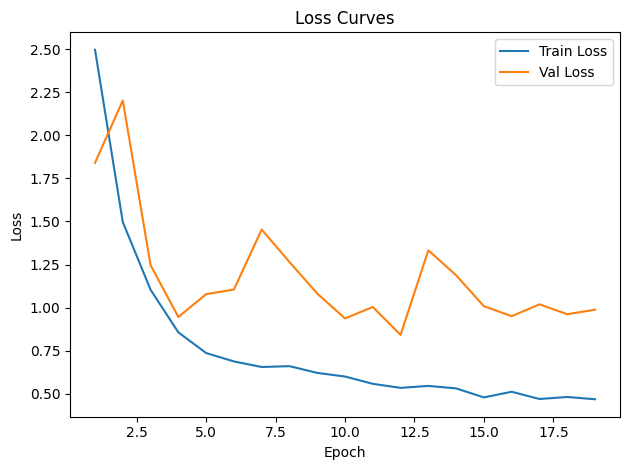

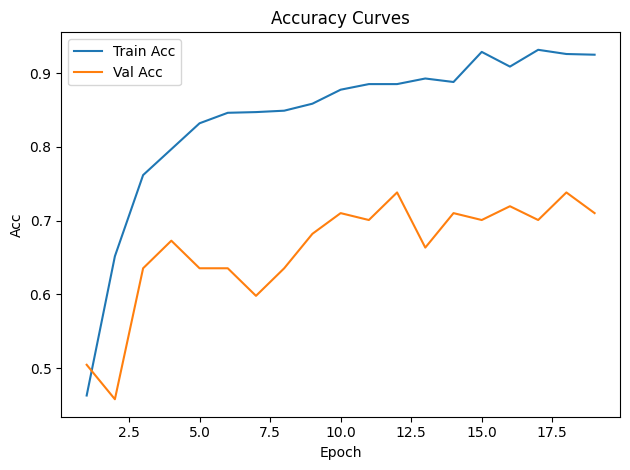

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
from timm import create_model
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# ─── Repro reproducibility ─────────────────────────────────────────────────────
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# ─── Device ────────────────────────────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ─── Paths & Hyperparams ──────────────────────────────────────────────────────
root_dir    = "/content/drive/MyDrive/Invoice_Reformed_DATA"
train_dir   = os.path.join(root_dir, "train")
val_dir     = os.path.join(root_dir, "val")
model_path  = "/content/best_efficientnetb3_invoice.pth"
batch_size  = 16
num_epochs  = 50
num_classes = 3
patience_es = 7   # early stopping

os.makedirs(os.path.dirname(model_path), exist_ok=True)

# ─── Augmentations & Normalization ───────────────────────────────────────────
train_tf = transforms.Compose([
    transforms.RandomResizedCrop(300, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2,0.2,0.2,0.05),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

val_tf = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

# ─── Dataset & Weighted Sampler ───────────────────────────────────────────────
train_ds = datasets.ImageFolder(train_dir, transform=train_tf)
val_ds   = datasets.ImageFolder(val_dir,   transform=val_tf)
class_names = train_ds.classes  # ["AI_GEN_INV","REAL","TAMPERED"]

# compute inverse-frequency weights per sample
labels = [label for _, label in train_ds.samples]
class_counts = np.bincount(labels)
class_weights = 1.0 / class_counts
sample_weights = [class_weights[label] for label in labels]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(
    train_ds,
    batch_size=batch_size,
    sampler=sampler,
    num_workers=2,
    pin_memory=True
)
val_loader = DataLoader(
    val_ds,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# ─── Model ─────────────────────────────────────────────────────────────────────
model = create_model(
    "efficientnet_b3",
    pretrained=True,
    num_classes=num_classes,
    drop_rate=0.3,
    drop_path_rate=0.2
).to(device)

# ─── Loss & Optimizer ─────────────────────────────────────────────────────────
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-5)

total_steps = num_epochs * len(train_loader)
scheduler   = OneCycleLR(
    optimizer,
    max_lr=3e-4,
    total_steps=total_steps,
    pct_start=0.1,
    div_factor=25.0,
    final_div_factor=1e4,
)

# ─── Training Loop ────────────────────────────────────────────────────────────
best_val_acc     = 0.0
epochs_no_improve= 0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

for epoch in range(1, num_epochs+1):
    print(f"\n=== Epoch {epoch}/{num_epochs} ===")
    model.train()
    run_loss, run_corr, run_n = 0.0, 0, 0

    for imgs, labels in tqdm(train_loader, desc="Train"):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        preds = outputs.argmax(dim=1)
        run_loss += loss.item() * imgs.size(0)
        run_corr += (preds == labels).sum().item()
        run_n   += imgs.size(0)

    train_loss = run_loss / run_n
    train_acc  = run_corr / run_n

    # ——— Validation ———
    model.eval()
    val_loss, val_corr, val_n = 0.0, 0, 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Val  "):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            preds = outputs.argmax(dim=1)

            val_loss += loss.item() * imgs.size(0)
            val_corr += (preds == labels).sum().item()
            val_n    += imgs.size(0)

            y_true.extend(labels.cpu().tolist())
            y_pred.extend(preds.cpu().tolist())

    val_loss = val_loss / val_n
    val_acc  = val_corr / val_n

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f" Val  Loss: {val_loss:.4f} |  Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), model_path)
        print(f"✔️  New best (Val Acc: {best_val_acc:.4f}) saved")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience_es:
            print(f"⏱  No improvement for {patience_es} epochs—stopping early.")
            break

# ─── Metrics & Plotting ───────────────────────────────────────────────────────
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

epochs = list(range(1, len(history["train_loss"])+1))
plt.figure()
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"],   label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss Curves")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(epochs, history["train_acc"], label="Train Acc")
plt.plot(epochs, history["val_acc"],   label="Val Acc")
plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.title("Accuracy Curves")
plt.legend(); plt.tight_layout(); plt.show()


# EffNet 79.44% val accuracy

In [ ]:
#BEST VAL Accuracy == 79.44%


import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from timm import create_model
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm
import matplotlib.pyplot as plt

# ─── Reproducibility ───────────────────────────────────────────────────────────
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# ─── Device ────────────────────────────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ─── Paths & Hyperparams ──────────────────────────────────────────────────────
root_dir    = "/content/drive/MyDrive/Invoice_Reformed_DATA"
train_dir   = os.path.join(root_dir, "train")
val_dir     = os.path.join(root_dir, "val")
model_path  = "/content/best_efficientnetb3_invoice.pth"
batch_size  = 16
num_epochs  = 50
num_classes = 3
patience_es = 7   # Early stopping patience

os.makedirs(os.path.dirname(model_path), exist_ok=True)

# ─── Augmentations & Normalization ───────────────────────────────────────────
train_tf = transforms.Compose([
    transforms.RandomResizedCrop(300, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.3,0.3,0.3,0.1),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5, scale=(0.02,0.2), ratio=(0.3,3.3)),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

val_tf = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

# ─── Dataset & Loaders ───────────────────────────────────────────────────────
train_ds = datasets.ImageFolder(train_dir, transform=train_tf)
val_ds   = datasets.ImageFolder(val_dir,   transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                          num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False,
                          num_workers=2, pin_memory=True)

# ─── Model with Dropout + Stochastic Depth ───────────────────────────────────
model = create_model(
    "efficientnet_b3",
    pretrained=True,
    num_classes=num_classes,
    drop_rate=0.3,
    drop_path_rate=0.2
).to(device)

# ─── Focal Loss Definition ────────────────────────────────────────────────────
class FocalLoss(nn.Module):
    def _init_(self, gamma=2.0, weight=None):
        super()._init_()
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=weight)

    def forward(self, logits, targets):
        logpt = -self.ce(logits, targets)
        pt = torch.exp(logpt)
        return -((1 - pt) ** self.gamma * logpt).mean()

criterion = FocalLoss(gamma=2.0)

# ─── Optimizer & OneCycle Scheduler ──────────────────────────────────────────
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-5)
total_steps = num_epochs * len(train_loader)
scheduler   = OneCycleLR(
    optimizer,
    max_lr=3e-4,
    total_steps=total_steps,
    pct_start=0.1,
    div_factor=25.0,
    final_div_factor=1e4,
)

# ─── MixUp with Scheduled α ───────────────────────────────────────────────────
def mixup_data(x, y, alpha):
    if alpha <= 0:
        return x, y, y, 1.0
    lam = np.random.beta(alpha, alpha)
    idx = torch.randperm(x.size(0)).to(x.device)
    mixed = lam * x + (1 - lam) * x[idx]
    return mixed, y, y[idx], lam

def get_mixup_alpha(epoch):
    if epoch < 5:   return 0.8
    elif epoch < 20: return 0.4
    else:           return 0.1

# ─── Training Loop ────────────────────────────────────────────────────────────
best_val_acc     = 0.0
epochs_no_improve= 0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

step = 0
for epoch in range(1, num_epochs+1):
    print(f"\n=== Epoch {epoch}/{num_epochs} ===")
    model.train()
    run_loss, run_corr, run_n = 0.0, 0, 0

    alpha = get_mixup_alpha(epoch)
    for imgs, labels in tqdm(train_loader, desc="Train"):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs, y_a, y_b, lam = mixup_data(imgs, labels, alpha)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = lam*criterion(outputs, y_a) + (1-lam)*criterion(outputs, y_b)
        loss.backward()
        optimizer.step()
        scheduler.step()   # onecycle per batch

        preds = outputs.argmax(dim=1)
        run_loss    += loss.item() * imgs.size(0)
        run_corr    += (lam*(preds==y_a).float() + (1-lam)*(preds==y_b).float()).sum().item()
        run_n       += imgs.size(0)

        step += 1

    train_loss = run_loss / run_n
    train_acc  = run_corr / run_n

    # ——— Validation ———
    model.eval()
    val_loss, val_corr, val_n = 0.0, 0, 0
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Val  "):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            preds = outputs.argmax(dim=1)

            val_loss += loss.item() * imgs.size(0)
            val_corr += (preds==labels).sum().item()
            val_n    += imgs.size(0)

    val_loss = val_loss / val_n
    val_acc  = val_corr / val_n

    # record history
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f" Val  Loss: {val_loss:.4f} |  Val Acc: {val_acc:.4f}")

    # Early stopping & best-model saving
    if val_acc > best_val_acc:
        best_val_acc      = val_acc
        torch.save(model.state_dict(), model_path)
        print(f"✔  New best (Val Acc: {best_val_acc:.4f}) saved")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience_es:
            print(f"⏱  No improvement for {patience_es} epochs—stopping.")
            break

# ─── Plotting ─────────────────────────────────────────────────────────────────
epochs = list(range(1, len(history["train_loss"]) + 1))

plt.figure()
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"],   label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(epochs, history["train_acc"], label="Train Acc")
plt.plot(epochs, history["val_acc"],   label="Val Acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Accuracy Curves")
plt.legend(); plt.tight_layout(); plt.show()

# ConvNext Aishani

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
from timm import create_model
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from collections import Counter
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


# ─── Reproducibility───────────────────────────────────────────────────────────
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

set_seed(42)

# ─── Device────────────────────────────────────────────────────────────────────
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ─── Paths & Enhanced Hyperparams─────────────────────────────────────────────
root_dir = "/content/drive/MyDrive/Invoice_Reformed_DATA"
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "val")
test_dir = os.path.join(root_dir, "test")
model_path = "/content/best_enhanced_invoice_classifier_III.pth"

# Enhanced hyperparameters for stability
batch_size = 12 # Reduced for better gradient stability
num_epochs = 100
num_classes = 3
patience_es = 15 # Increased patience
learning_rate = 1e-4 # More conservative learning rate
weight_decay = 1e-4
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# ─── Custom Multi-Scale Feature Extractor────────────────────────────────────
class GradientFeatureExtractor(nn.Module):
  """Extracts gradient-based features to detect tampering artifacts"""
  def __init__(self):
    super().__init__()
    # Sobel filters for edge detection
    sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
    sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)

    self.register_buffer('sobel_x', sobel_x.view(1, 1, 3, 3))
    self.register_buffer('sobel_y', sobel_y.view(1, 1, 3, 3))

    # Laplacian filter for detecting discontinuities
    laplacian = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
    self.register_buffer('laplacian', laplacian.view(1, 1, 3, 3))

  def forward(self, x):
    # Convert to grayscale
    gray = 0.299 * x[:, 0:1] + 0.587 * x[:, 1:2] + 0.114 * x[:, 2:3]

    # Apply filters
    grad_x = F.conv2d(gray, self.sobel_x, padding=1)
    grad_y = F.conv2d(gray, self.sobel_y, padding=1)
    gradient_mag = torch.sqrt(grad_x**2 + grad_y**2)

    laplacian_resp = F.conv2d(gray, self.laplacian, padding=1)
    return torch.cat([gradient_mag, laplacian_resp], dim=1)

class EnhancedInvoiceClassifier(nn.Module):
  """Enhanced classifier with multi-scale features and gradient analysis"""
  def __init__(self, num_classes=3, model_name='convnext_base'):
    super().__init__()

    # Main feature extractor - ConvNeXt for better feature representation
    self.backbone = create_model(
        model_name,
        pretrained=True,
        num_classes=0, # Remove classification head
        global_pool='avg'
    )

    # Gradient feature extractor for tampering detection
    self.gradient_extractor = GradientFeatureExtractor()

    # Get backbone feature dimension
    with torch.no_grad():
      dummy_input = torch.randn(1, 3, 384, 384)
      backbone_features = self.backbone(dummy_input).shape[1]


    # Gradient processing branch
    self.gradient_conv = nn.Sequential(
        nn.Conv2d(2, 32, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.AdaptiveAvgPool2d(8),
        nn.Conv2d(32, 64, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.AdaptiveAvgPool2d(4),
        nn.Conv2d(64, 128, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
    )


    # Fusion and classification layers
    self.fusion = nn.Sequential(
        nn.Linear(backbone_features + 128, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.3),
        nn.Linear(512, 256),
        nn.ReLU(inplace=True),
        nn.Dropout(0.2),
        nn.Linear(256, num_classes)
    )


    # Initialize weights
    self._initialize_weights()

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

  def forward(self, x):
    # Extract main features
    main_features = self.backbone(x)

    # Extract gradient features
    gradient_features = self.gradient_extractor(x)
    gradient_features = self.gradient_conv(gradient_features)

    # Fuse features
    combined_features = torch.cat([main_features, gradient_features], dim=1)

    # Final classification
    output = self.fusion(combined_features)

    return output

# ─── Enhanced Data Augmentation──────────────────────────────────────────────

class TamperingAwareTransform:
  """Custom transform that preserves tampering artifacts while augmenting"""
  def __init__(self, size=384):
    self.size = size

  def __call__(self, img):
    # Convert to numpy for processing
    img_np = np.array(img)

    # Preserve high-frequency details during resize
    img_resized = cv2.resize(img_np, (self.size, self.size), interpolation=cv2.INTER_CUBIC)

    return Image.fromarray(img_resized)


# Enhanced augmentations
train_transforms = transforms.Compose([
    TamperingAwareTransform(384),
    transforms.RandomHorizontalFlip(p=0.3), # Reduced probability
    transforms.RandomRotation(10, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1)) # Reduced to preserve tampering evidence
])

val_transforms = transforms.Compose([
    TamperingAwareTransform(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# ─── Dataset with Class Balancing────────────────────────────────────────────
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

# Calculate class weights for balanced training
class_counts = Counter(train_dataset.targets)
total_samples = len(train_dataset)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# Create weighted sampler
sample_weights = [class_weights[target] for target in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler,
                          num_workers=4, pin_memory=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=4, pin_memory=True)

# ─── Enhanced Loss Function──────────────────────────────────────────────────
class EnhancedFocalLoss(nn.Module):
  def __init__(self, alpha=None, gamma=2.0, label_smoothing=0.1):
    super().__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.label_smoothing = label_smoothing

  def forward(self, inputs, targets):
    ce_loss = F.cross_entropy(inputs, targets, reduction='none')
    pt = torch.exp(-ce_loss)
    focal_loss = (1 - pt) ** self.gamma * ce_loss

    if self.alpha is not None:
      alpha_t = self.alpha[targets]
      focal_loss = alpha_t * focal_loss

    # Apply label smoothing
    if self.label_smoothing > 0:
      smooth_loss = F.cross_entropy(inputs, targets, label_smoothing=self.label_smoothing)
      focal_loss = 0.8 * focal_loss.mean() + 0.2 * smooth_loss
    else:
      focal_loss = focal_loss.mean()

    return focal_loss

# Initialize model and training components
model = EnhancedInvoiceClassifier(num_classes=num_classes,
model_name='convnext_base').to(device)

# Class weights for focal loss
alpha = torch.tensor([class_weights[i] for i in range(num_classes)]).to(device)
criterion = EnhancedFocalLoss(alpha=alpha, gamma=2.0, label_smoothing=0.1)

# Enhanced optimizer with gradient clipping
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay,
                        betas=(0.9, 0.999), eps=1e-8)
# Cosine annealing with warm restarts for stable training
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=30, T_mult=2, eta_min=1e-6)

# ─── Training with Enhanced Stability────────────────────────────────────────
def train_epoch(model, loader, criterion, optimizer, device, epoch):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0
  pbar = tqdm(loader, desc=f'Epoch {epoch} Training')
  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)

    loss.backward()
    # Gradient clipping for stability
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    running_loss += loss.item()
    pred = output.argmax(dim=1)
    correct += pred.eq(target).sum().item()
    total += target.size(0)

    # Update progress bar
    pbar.set_postfix({
        'Loss': f'{running_loss/(batch_idx+1):.4f}',
        'Acc': f'{100.*correct/total:.2f}%'
    })

  return running_loss / len(loader), correct / total


def validate_epoch(model, loader, criterion, device):
  model.eval()
  running_loss = 0.0
  correct = 0
  total = 0
  all_preds = []
  all_targets = []

  with torch.no_grad():
    for data, target in tqdm(loader, desc='Validating'):
      data, target = data.to(device), target.to(device)
      output = model(data)
      loss = criterion(output, target)

      running_loss += loss.item()
      pred = output.argmax(dim=1)
      correct += pred.eq(target).sum().item()
      total += target.size(0)

      all_preds.extend(pred.cpu().numpy())
      all_targets.extend(target.cpu().numpy())

  return running_loss / len(loader), correct / total, all_preds, all_targets


# ─── Enhanced Training Loop──────────────────────────────────────────────────
print("Starting enhanced training...")
best_val_acc = 0.0
epochs_no_improve = 0
history = {
    'train_loss': [], 'val_loss': [],
    'train_acc': [], 'val_acc': [],
    'lr': []
}

for epoch in range(1, num_epochs + 1):
  print(f"\n{'='*50}")
  print(f"Epoch {epoch}/{num_epochs}")
  print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.2e}")

  # Training
  train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device, epoch)
  # Validation
  val_loss, val_acc, val_preds, val_targets = validate_epoch(model, val_loader, criterion,
                                                             device)
  # Update scheduler
  scheduler.step()

  # Record history
  history['train_loss'].append(train_loss)
  history['val_loss'].append(val_loss)
  history['train_acc'].append(train_acc)
  history['val_acc'].append(val_acc)
  history['lr'].append(optimizer.param_groups[0]['lr'])

  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
  print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

  # Save best model
  if val_acc > best_val_acc:
    best_val_acc = val_acc
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_acc': val_acc,
        'class_names': train_dataset.classes
    }, model_path)
    print(f"✅ New best model saved! Val Acc: {best_val_acc:.4f}")
    epochs_no_improve = 0
  else:
    epochs_no_improve += 1

  # Early stopping
  if epochs_no_improve >= patience_es:
    print(f"⏹️ Early stopping after {patience_es} epochs without improvement")
    break

# ─── Enhanced Visualization──────────────────────────────────────────────────
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Loss curves with smoothing
epochs_range = range(1, len(history['train_loss']) + 1)

# Smooth curves using moving average
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_train_loss = smooth_curve(history['train_loss'])
smooth_val_loss = smooth_curve(history['val_loss'])
smooth_train_acc = smooth_curve(history['train_acc'])
smooth_val_acc = smooth_curve(history['val_acc'])

# Plot losses
axes[0, 0].plot(epochs_range, smooth_train_loss, 'b-', label='Train Loss', linewidth=2)
axes[0, 0].plot(epochs_range, smooth_val_loss, 'r-', label='Val Loss', linewidth=2)
axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot accuracies
axes[0, 1].plot(epochs_range, smooth_train_acc, 'b-', label='Train Acc', linewidth=2)
axes[0, 1].plot(epochs_range, smooth_val_acc, 'r-', label='Val Acc', linewidth=2)
axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning rate schedule
axes[1, 0].plot(epochs_range, history['lr'], 'g-', linewidth=2)
axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Confusion matrix
cm = confusion_matrix(val_targets, val_preds)
class_names = ['AI Generated', 'Real', 'Tampered']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=class_names, yticklabels=class_names,
ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

# ─── Detailed Classification Report──────────────────────────────────────────
print("\n" + "="*60)
print("FINAL CLASSIFICATION REPORT")
print("="*60)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(val_targets, val_preds, target_names=class_names, digits=4))

# Per-class analysis
print("\nPer-Class Analysis:")
for i, class_name in enumerate(class_names):
  class_mask = np.array(val_targets) == i
  class_acc = np.mean(np.array(val_preds)[class_mask] == i)
  print(f"{class_name}: {class_acc:.4f} accuracy ({np.sum(class_mask)} samples)")

print(f"\nModel saved at: {model_path}")
print("Training completed successfully! 🎉")

# ─── Test Set Evaluation (Optional)──────────────────────────────────────────
if os.path.exists(test_dir):
  print(f"\n{'='*50}")
  print("EVALUATING ON TEST SET")
  print("="*50)

test_dataset = datasets.ImageFolder(test_dir, transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=4, pin_memory=True)

# Load best model
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])

test_loss, test_acc, test_preds, test_targets = validate_epoch(model, test_loader, criterion,
                                                               device)
print(f"Test Accuracy: {test_acc:.4f}")
print("\nTest Set Classification Report:")
print(classification_report(test_targets, test_preds, target_names=class_names, digits=4))

# Test confusion matrix
plt.figure(figsize=(8, 6))
test_cm = confusion_matrix(test_targets, test_preds)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Test Set Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Using device: cuda
Starting enhanced training...

Epoch 1/100
Learning Rate: 1.00e-04


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


Train Loss: 0.7390 | Train Acc: 0.3420
Val Loss: 0.5809 | Val Acc: 0.6075
✅ New best model saved! Val Acc: 0.6075

Epoch 2/100
Learning Rate: 9.97e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Train Loss: 0.5429 | Train Acc: 0.4856
Val Loss: 0.4137 | Val Acc: 0.5514

Epoch 3/100
Learning Rate: 9.89e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


Train Loss: 0.4906 | Train Acc: 0.5565
Val Loss: 0.3594 | Val Acc: 0.7664
✅ New best model saved! Val Acc: 0.7664

Epoch 4/100
Learning Rate: 9.76e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


Train Loss: 0.4154 | Train Acc: 0.6274
Val Loss: 0.3448 | Val Acc: 0.7944
✅ New best model saved! Val Acc: 0.7944

Epoch 5/100
Learning Rate: 9.57e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


Train Loss: 0.3557 | Train Acc: 0.6839
Val Loss: 0.4499 | Val Acc: 0.7383

Epoch 6/100
Learning Rate: 9.34e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]


Train Loss: 0.3446 | Train Acc: 0.7193
Val Loss: 0.3120 | Val Acc: 0.8131
✅ New best model saved! Val Acc: 0.8131

Epoch 7/100
Learning Rate: 9.05e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Train Loss: 0.3396 | Train Acc: 0.6734
Val Loss: 0.3251 | Val Acc: 0.8131

Epoch 8/100
Learning Rate: 8.73e-05


Validating: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]


Train Loss: 0.2763 | Train Acc: 0.7615
Val Loss: 0.3593 | Val Acc: 0.8131

Epoch 9/100
Learning Rate: 8.36e-05


Validating: 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]


Train Loss: 0.3045 | Train Acc: 0.7222
Val Loss: 0.2861 | Val Acc: 0.8224
✅ New best model saved! Val Acc: 0.8224

Epoch 10/100
Learning Rate: 7.96e-05


Validating: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


Train Loss: 0.2759 | Train Acc: 0.7519
Val Loss: 0.3754 | Val Acc: 0.7944

Epoch 11/100
Learning Rate: 7.52e-05


Epoch 11 Training:  74%|███████▎  | 64/87 [01:51<00:38,  1.69s/it, Loss=0.2760, Acc=74.61%]

# Resnet50 small tampered dataset

<Figure size 640x480 with 0 Axes>

Classes & counts:
{'AI_GEN_INV': 279, 'real_invoice': 278, 'tampered_imgs': 139}


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch 1/25


Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val: 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]


Train Loss:0.3886, Acc:86.21% | Val Loss:7.1574, Acc:67.44%
Saved best 67.44%
Epoch 2/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.1822, Acc:93.82% | Val Loss:1.9855, Acc:90.70%
Saved best 90.70%
Epoch 3/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.3420, Acc:89.51% | Val Loss:0.6361, Acc:63.95%
Epoch 4/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.1894, Acc:94.40% | Val Loss:0.1441, Acc:95.35%
Saved best 95.35%
Epoch 5/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0788, Acc:96.98% | Val Loss:0.1762, Acc:94.19%
Epoch 6/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.1185, Acc:97.84% | Val Loss:0.3269, Acc:95.35%
Epoch 7/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0943, Acc:96.55% | Val Loss:0.1645, Acc:96.51%
Saved best 96.51%
Epoch 8/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0497, Acc:98.71% | Val Loss:0.1766, Acc:95.35%
Epoch 9/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0365, Acc:99.43% | Val Loss:0.2258, Acc:95.35%
Epoch 10/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0337, Acc:99.14% | Val Loss:0.2210, Acc:95.35%
Epoch 11/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0258, Acc:99.43% | Val Loss:0.2002, Acc:95.35%
Epoch 12/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0345, Acc:98.85% | Val Loss:0.1682, Acc:95.35%
Epoch 13/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0141, Acc:99.71% | Val Loss:0.2037, Acc:95.35%
Epoch 14/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0653, Acc:97.56% | Val Loss:0.2043, Acc:95.35%
Epoch 15/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0183, Acc:99.28% | Val Loss:0.1818, Acc:95.35%
Epoch 16/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0582, Acc:98.13% | Val Loss:0.1316, Acc:95.35%
Epoch 17/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val: 100%|██████████| 3/3 [00:07<00:00,  2.51s/it]


Train Loss:0.0240, Acc:99.43% | Val Loss:0.2163, Acc:95.35%
Epoch 18/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0119, Acc:99.71% | Val Loss:0.1959, Acc:95.35%
Epoch 19/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0213, Acc:99.43% | Val Loss:0.1911, Acc:95.35%
Epoch 20/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0210, Acc:99.43% | Val Loss:0.1977, Acc:95.35%
Epoch 21/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0268, Acc:98.99% | Val Loss:0.2011, Acc:95.35%
Epoch 22/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0176, Acc:99.71% | Val Loss:0.2096, Acc:95.35%
Epoch 23/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0287, Acc:98.99% | Val Loss:0.1678, Acc:95.35%
Epoch 24/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0136, Acc:99.71% | Val Loss:0.1526, Acc:95.35%
Epoch 25/25


Train:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Val

Train Loss:0.0187, Acc:99.57% | Val Loss:0.1877, Acc:95.35%


Test:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Test: 100%|██████████| 3/3 [00:08<00:00,  2.94s/it]


Test Acc: 100.0
               precision    recall  f1-score   support

   AI_GEN_INV       1.00      1.00      1.00        34
 real_invoice       1.00      1.00      1.00        34
tampered_imgs       1.00      1.00      1.00        18

     accuracy                           1.00        86
    macro avg       1.00      1.00      1.00        86
 weighted avg       1.00      1.00      1.00        86



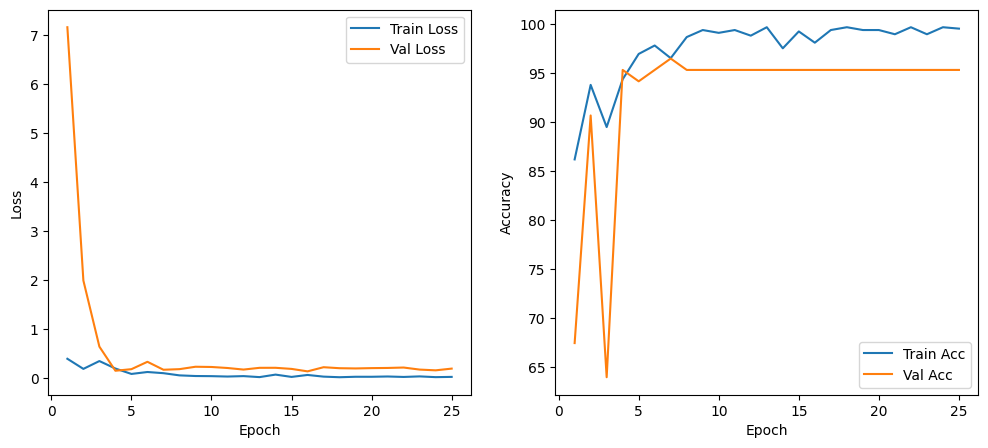

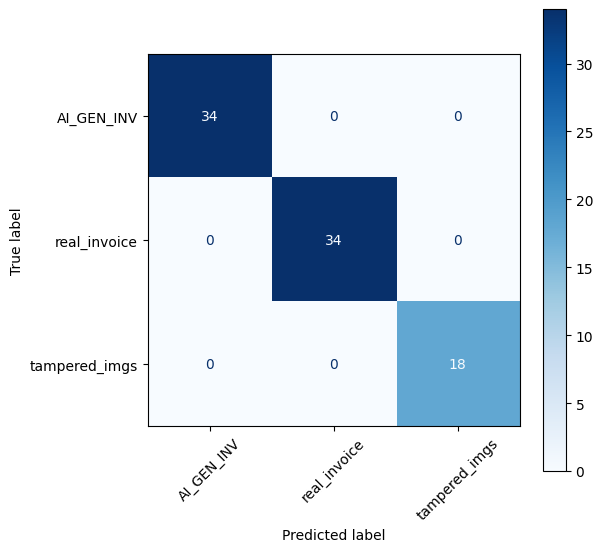

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms, models
from PIL import Image
import os
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm

# Enable optimized cuDNN
torch.backends.cudnn.benchmark = True

# Dataset class: auto-discovers classes including tampered_img
class InvoiceDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.transform = transform
        self.images, self.labels = [], []
        # auto-discover subfolders as classes
        self.class_names = sorted(d for d in os.listdir(root_dir)
                                  if os.path.isdir(os.path.join(root_dir, d)))
        cls_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}
        for cls in self.class_names:
            folder = os.path.join(root_dir, cls, split)
            if not os.path.isdir(folder):
                continue
            for fname in os.listdir(folder):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.images.append(os.path.join(folder, fname))
                    self.labels.append(cls_to_idx[cls])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.open(self.images[idx]).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# Model definition
class InvoiceClassifier(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        self.backbone = models.resnet50(pretrained=pretrained)
        in_feats = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_feats, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# Transforms: include augmentation for train only
def get_transforms():
    train_tf = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(0.2,0.2,0.2,0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
    val_tf = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
    return train_tf, val_tf

# Training function records history
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device):
  model.to(device)
  if torch.cuda.device_count()>1:
    model = nn.DataParallel(model)
  best_acc=0
  history={'train_loss':[],'val_loss':[],'train_acc':[],'val_acc':[]}
  for epoch in range(1, epochs+1):
      print(f"Epoch {epoch}/{epochs}")
      # train
      model.train()
      running_loss, correct, total = 0,0,0
      for imgs, labels in tqdm(train_loader, desc='Train'):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outs = model(imgs)
        loss = criterion(outs, labels)
        loss.backward(); optimizer.step()
        running_loss += loss.item()
        preds = outs.argmax(1)
        correct += (preds==labels).sum().item(); total+=labels.size(0)
      train_loss = running_loss/len(train_loader)
      train_acc = 100*correct/total
      history['train_loss'].append(train_loss)
      history['train_acc'].append(train_acc)
      # val
      model.eval()
      val_loss, vcorrect, vtotal = 0,0,0
      with torch.no_grad():
        for imgs,labels in tqdm(val_loader, desc='Val'):
          imgs, labels = imgs.to(device), labels.to(device)
          outs = model(imgs)
          val_loss += criterion(outs, labels).item()
          preds = outs.argmax(1)
          vcorrect += (preds==labels).sum().item(); vtotal+=labels.size(0)
      val_loss/=len(val_loader)
      val_acc=100*vcorrect/vtotal
      history['val_loss'].append(val_loss)
      history['val_acc'].append(val_acc)
      print(f"Train Loss:{train_loss:.4f}, Acc:{train_acc:.2f}% | Val Loss:{val_loss:.4f}, Acc:{val_acc:.2f}%")
      if val_acc>best_acc:
        best_acc=val_acc
        torch.save(model.state_dict(),'/content/drive/MyDrive/Assets_invoice/models/best_invoice_classifier_3class_III.pth')
        print(f"Saved best {best_acc:.2f}%")
      scheduler.step()
  return history

# Plot history
def plot_history(hist):
    epochs=range(1,len(hist['train_loss'])+1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs,hist['train_loss'],label='Train Loss')
    plt.plot(epochs,hist['val_loss'],label='Val Loss')
    plt.xlabel('Epoch');plt.ylabel('Loss');plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs,hist['train_acc'],label='Train Acc')
    plt.plot(epochs,hist['val_acc'],label='Val Acc')
    plt.xlabel('Epoch');plt.ylabel('Accuracy');plt.legend()
plt.tight_layout();plt.show()

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate_model(model, test_loader, device):
  model.to(device).eval()
  all_preds, all_labels = [],[]
  with torch.no_grad():
    for imgs,labels in tqdm(test_loader,desc='Test'):
      imgs=imgs.to(device)
      outs=model(imgs)
      preds=outs.argmax(1).cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(labels.numpy())
  print("Test Acc:",accuracy_score(all_labels,all_preds)*100)
  print(classification_report(all_labels,all_preds,target_names=test_loader.dataset.class_names))
  cm=confusion_matrix(all_labels,all_preds)
  disp=ConfusionMatrixDisplay(cm,display_labels=test_loader.dataset.class_names)
  fig,ax=plt.subplots(figsize=(6,6));disp.plot(ax=ax,cmap='Blues',xticks_rotation=45)
  plt.show()

# Main
if __name__=='__main__':
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    root='/content/drive/MyDrive/INVOICE_DATASET/'
    train_tf,val_tf=get_transforms()
    train_ds=InvoiceDataset(root,'train',train_tf)
    val_ds  =InvoiceDataset(root,'val',val_tf)
    test_ds =InvoiceDataset(root,'test',val_tf)
    print("Classes & counts:")
    counts={cls:len([1 for _,lbl in zip(train_ds.images,train_ds.labels) if train_ds.class_names[lbl]==cls])
            for cls in train_ds.class_names}
    print(counts)
    # sampler for balance
    label_count=np.bincount(train_ds.labels)
    weights=1.0/label_count
    sample_weights=[weights[lbl] for lbl in train_ds.labels]
    sampler=WeightedRandomSampler(sample_weights,len(sample_weights),replacement=True)
    train_loader=DataLoader(train_ds,batch_size=32,sampler=sampler,num_workers=4,pin_memory=True)
    val_loader=DataLoader(val_ds,batch_size=32,shuffle=False,num_workers=4,pin_memory=True)
    test_loader=DataLoader(test_ds,batch_size=32,shuffle=False,num_workers=4,pin_memory=True)
    model=InvoiceClassifier(num_classes=len(train_ds.class_names))
    if torch.cuda.device_count()>1: model=nn.DataParallel(model)
    opt=optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-4)
    sch=optim.lr_scheduler.StepLR(opt,step_size=7,gamma=0.1)
    hist=train_model(model,train_loader,val_loader,nn.CrossEntropyLoss(),opt,sch,epochs=25,device=device)
    plot_history(hist)
    model.load_state_dict(torch.load('/content/drive/MyDrive/Assets_invoice/models/best_invoice_classifier_3class_III.pth'))
    evaluate_model(model,test_loader,device)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packa

Classification Report:

               precision    recall  f1-score   support

   AI_GEN_INV       1.00      1.00      1.00        34
 real_invoice       1.00      1.00      1.00        34
tampered_imgs       1.00      1.00      1.00        18

     accuracy                           1.00        86
    macro avg       1.00      1.00      1.00        86
 weighted avg       1.00      1.00      1.00        86



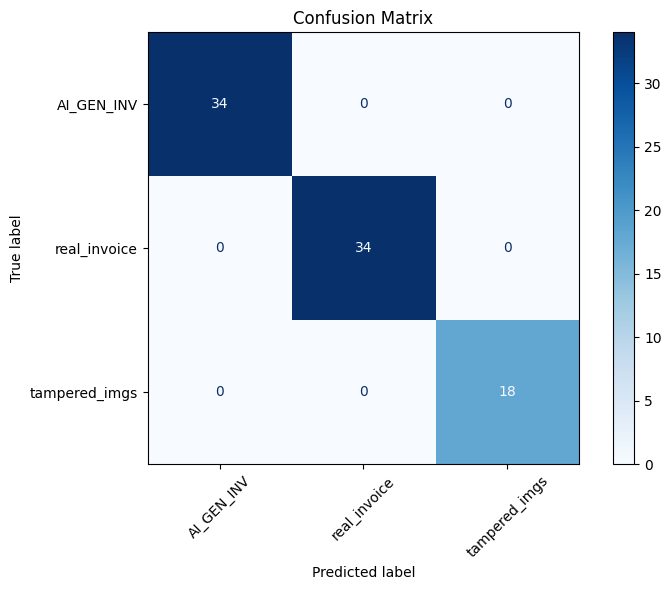

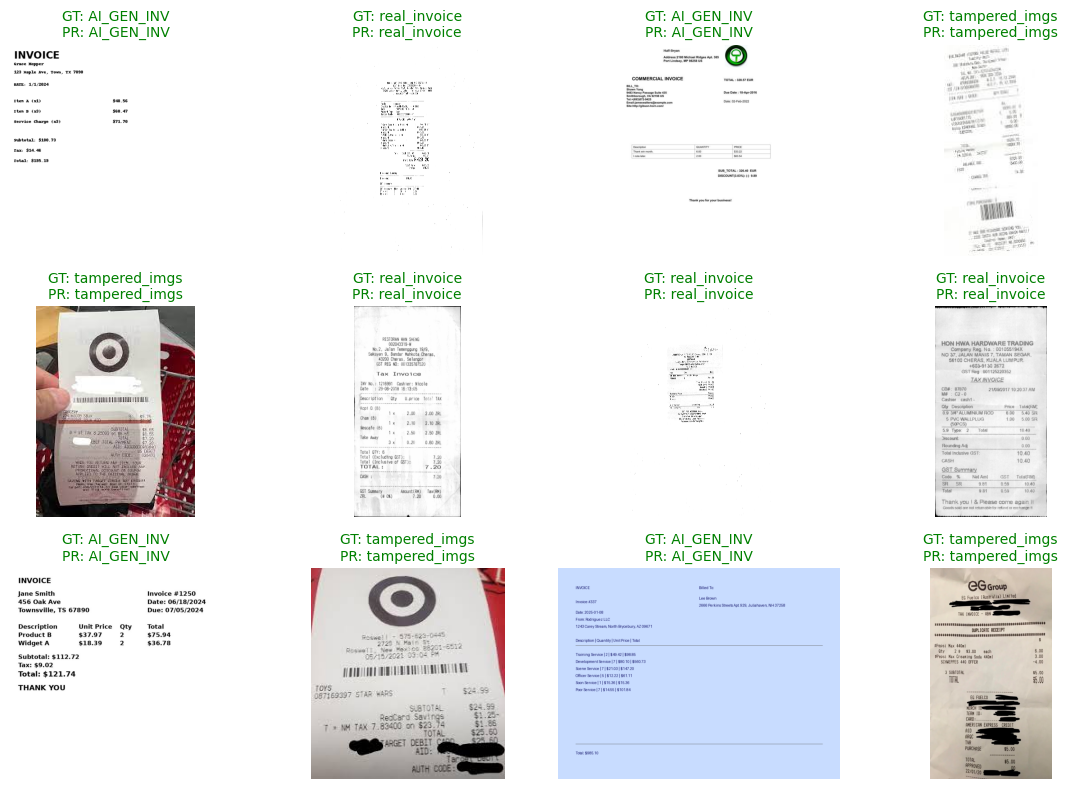

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import random
import os
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dataset
class InvoiceDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, split='test', transform=None):
        self.transform = transform
        self.images, self.labels = [], []
        # Exclude hidden directories and 'models' when discovering classes
        self.class_names = sorted([d for d in os.listdir(root_dir)
                                   if os.path.isdir(os.path.join(root_dir, d)) and not d.startswith('.') and d != 'models'])
        cls_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}
        for cls in self.class_names:
            folder = os.path.join(root_dir, cls, split)
            if not os.path.isdir(folder):
                continue
            for fname in os.listdir(folder):
                if fname.lower().endswith(('.png', 'jpg', 'jpeg')):
                    self.images.append(os.path.join(folder, fname))
                    self.labels.append(cls_to_idx[cls])

    def __len__(self): return len(self.images)
    def __getitem__(self, i):
        img = Image.open(self.images[i]).convert('RGB')
        if self.transform: img = self.transform(img)
        return img, self.labels[i], self.images[i]

# Model
class InvoiceClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.backbone = models.resnet50(pretrained=False)
        in_f = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_f, 512), nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
    def forward(self, x): return self.backbone(x)

# Transforms and dataset/loader
val_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
root_dir = '/content/drive/MyDrive/INVOICE_DATASET/'  # adjust path
test_ds = InvoiceDataset(root_dir, split='test', transform=val_tf)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False, pin_memory=True, num_workers=4)

# Load model and checkpoint
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = InvoiceClassifier(num_classes=len(test_ds.class_names))
model.load_state_dict(torch.load('/content/drive/MyDrive/Assets_invoice/models/best_invoice_classifier_3class_III.pth', map_location=device))

if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)
model.to(device)
model.eval()

# Prediction
all_preds, all_labels, all_paths = [], [], []
with torch.no_grad():
    for imgs, labels, paths in test_loader:
      imgs = imgs.to(device)
      outs = model(imgs)
      preds = outs.argmax(dim=1).cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(labels.numpy())
      all_paths.extend(paths)

# Classification Report
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=test_ds.class_names))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Visualization of Random Predictions
N = 12
idxs = random.sample(range(len(all_preds)), N)
plt.figure(figsize=(12, 8))
for i, idx in enumerate(idxs):
    img = Image.open(all_paths[idx]).convert('RGB')
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    gt = test_ds.class_names[all_labels[idx]]
    pr = test_ds.class_names[all_preds[idx]]
    color = 'green' if gt == pr else 'red'
    plt.title(f'GT: {gt}\nPR: {pr}', color=color, fontsize=10)
plt.tight_layout()
plt.show()

# Text ectraction and classification of invoices

## Try two ways
    --> Zero-Shot
    --> Using BERT and manually labelling the data before training.

In [ ]:
# 1) Install and import
!pip install pytesseract transformers torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install pytesseract

# Zero Shot Classification
## model="roberta-large-mnli"

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
!pip install torch transformers torchvision

In [ ]:
import os
import re
import numpy as np
import easyocr
import nltk
from PIL import Image, ImageEnhance
from transformers import pipeline
import torch
from collections import Counter
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Download required NLTK data
try:
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)  # For newer NLTK versions
except Exception as e:
    logger.warning(f"NLTK download warning: {e}")

from nltk.corpus import wordnet as wn, stopwords
try:
    from nltk.tokenize import word_tokenize
except ImportError:
    # Fallback tokenizer if NLTK fails
    def word_tokenize(text):
        return re.findall(r'\b\w+\b', text.lower())

class InvoiceClassifier:
    def __init__(self):
        # Initialize EasyOCR reader with better error handling
        try:
            self.reader = easyocr.Reader(['en'], gpu=torch.cuda.is_available())
        except Exception as e:
            logger.warning(f"Failed to initialize EasyOCR with GPU, falling back to CPU: {e}")
            self.reader = easyocr.Reader(['en'], gpu=False)

        # Load multiple models for ensemble with error handling
        self.classifiers = []

        # Try to load primary classifier
        try:
            classifier1 = pipeline(
                "zero-shot-classification",
                model="facebook/bart-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier1)
        except Exception as e:
            logger.warning(f"Failed to load BART model: {e}")

        # Try to load secondary classifier
        try:
            classifier2 = pipeline(
                "zero-shot-classification",
                model="roberta-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier2)
        except Exception as e:
            logger.warning(f"Failed to load RoBERTa model: {e}")

        # Fallback to a lighter model if needed
        if not self.classifiers:
            try:
                fallback_classifier = pipeline(
                    "zero-shot-classification",
                    model="typeform/distilbert-base-uncased-mnli",
                    device=-1  # Force CPU for compatibility
                )
                self.classifiers.append(fallback_classifier)
                logger.info("Using fallback DistilBERT model")
            except Exception as e:
                logger.error(f"Failed to load any classifier: {e}")
                raise RuntimeError("No classification model could be loaded")

        logger.info(f"Successfully loaded {len(self.classifiers)} classifier(s)")

        # Enhanced candidate labels with better descriptions
        self.candidate_labels = [
            "travel and transportation services",
            "hotel accommodation and lodging",
            "entertainment and recreational activities",
            "medical and healthcare services",
            "restaurant meals and food services",
            "grocery and retail shopping",
            "office supplies and stationery items"
        ]

        # Comprehensive keyword mapping with weights
        self.weighted_keywords = {
            "travel and transportation services": {
                # High weight keywords (strong indicators)
                "airline": 3.0, "flight": 3.0, "boarding pass": 3.0, "seat": 2.0,
                "railway": 3.0, "train ticket": 3.0, "platform": 2.5,
                "uber": 3.0, "lyft": 3.0, "ola": 3.0, "cab fare": 3.0,
                "metro card": 3.0, "bus ticket": 3.0, "toll": 2.0, "park": 2.0, "ticket": 2.0, "taxi" : 3.0,
                # Medium weight keywords
                "journey": 2.0, "passenger": 2.0, "departure": 2.0, "arrival": 2.0,
                "terminal": 2.0, "gate": 1.5, "coach": 1.5,
                # Low weight keywords
                "transport": 2.0, "travel": 2.0, "trip": 2.0
            },
            "hotel accommodation and lodging": {
                # High weight keywords
                "hotel": 3.0, "resort": 3.0, "check-in": 3.0, "check-out": 3.0,
                "room charge": 3.0, "night stay": 3.0, "accommodation": 3.0,
                "suite": 2.5,
                # Medium weight keywords
                "lodge": 2.0, "inn": 2.0, "motel": 2.0, "hostel": 2.0,
                "occupancy": 1.5,
                # Low weight keywords
                "stay": 1.0, "room": 1.0, "booking": 1.0, "reservation": 1.5
            },
            "entertainment and recreational activities": {
                # High weight keywords
                "cinema": 3.0, "movie ticket": 3.0, "theatre": 3.0, "concert": 3.0,
                "amusement park": 3.0, "show ticket": 3.0, "performance": 2.5,
                "gallery": 2.5, "museum": 2.5, "arcade": 2.5, "arcade": 2.5,
                "entertainment": 3.0, "recreation":3.0, "movie" : 3.0, "event" : 3.0,
                # Medium weight keywords
                "entertainment": 2.0, "event": 1.5,
                "admission": 1.5, "exhibit": 1.5,
                # Low weight keywords
                "fun": 1.0, "activity": 1.0, "park" : 1.0
            },
            "medical and healthcare services": {
                # High weight keywords
                "pharmacy": 3.0, "prescription": 3.0, "medicine": 3.0, "clinic": 3.0,
                "hospital": 3.0, "doctor": 3.0, "consultation": 3.0,
                "medical": 3.0, "healthcare": 3.0, "treatment": 2.5,
                "diagnosis": 2.5, "therapy": 2.5, "surgery": 2.5,
                # Medium weight keywords
                "lab test": 2.0, "x-ray": 2.0, "ultrasound": 2.0, "vaccine": 2.0,
                "injection": 2.0, "checkup": 2.0,
                # Low weight keywords
                "health": 1.0, "care": 1.0
            },
            "restaurant meals and food services": {
                # High weight keywords
                "restaurant": 3.5, "diner": 3.5, "cafe": 3.0, "bistro": 3.0,
                "food delivery": 3.0, "takeaway": 3.0, "dining": 3.5,
                "menu": 3.0, "meal": 3.0, "dish": 2.5, "cuisine": 3.0,
                # Medium weight keywords
                "breakfast": 2.0, "lunch": 2.0, "dinner": 2.0, "brunch": 2.0,
                "beverage": 2.0, "coffee": 2.5, "tea": 2.5, "alcohol": 2.0,
                "pizza": 2.5, "burger": 2.5, "sandwich": 2.5, "pasta": 2.0,
                # Service-specific keywords
                "zomato": 3.0, "swiggy": 3.0, "ubereats": 3.0, "doordash": 3.0,
                # Low weight keywords
                "food": 1.0, "eat": 1.0, "serve": 1.0
            },
            "grocery and retail shopping": {
                # High weight keywords
                "grocery": 3.0, "supermarket": 3.0, "retail": 3.0, "shopping": 3.0,
                "department store": 3.0, "mall": 2.5, "marketplace": 2.5, "hardware" : 2.5,
                # Product categories
                "produce": 2.0, "dairy": 2.0, "bakery": 2.0, "meat": 2.0,
                "vegetables": 2.0, "fruits": 2.0, "frozen": 2.0,
                "household": 2.0, "cleaning": 2.0, "personal care": 2.0,
                # Medium weight keywords
                "aisle": 1.5, "checkout": 1.5, "cart": 2.0, "basket": 1.5,
                # Low weight keywords
                "store": 1.0, "shop": 1.0, "buy": 1.0, "purchase": 1.0
            },
            "office supplies and stationery items": {
                # High weight keywords
                "stationery": 3.0, "office supplies": 3.0, "notebook": 3.0,
                "pen": 2.5, "pencil": 2.5, "marker": 2.5, "highlighter": 2.5,
                "stapler": 2.5, "binder": 2.5, "folder": 2.5, "hardware" : 3.5, "software" : 3.0,
                # Medium weight keywords
                "paper": 2.0, "envelope": 2.0, "sticky note": 2.0, "post-it": 2.0,
                "paperclip": 2.0, "ruler": 2.0, "eraser": 2.0, "glue": 2.0,
                "ink": 2.0, "toner": 2.0, "cartridge": 2.0,
                # Low weight keywords
                "office": 1.0, "supplies": 1.0, "equipment": 1.0
            }
        }

        # Stop words to filter out (with fallback)
        try:
            self.stop_words = set(stopwords.words('english'))
        except Exception as e:
            logger.warning(f"Failed to load stopwords, using basic set: {e}")
            self.stop_words = {
                'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
                'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                'while', 'of', 'at', 'by', 'for', 'with', 'through', 'during', 'before', 'after',
                'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
                'further', 'then', 'once'
            }

        # Common misclassification patterns to handle
        self.disambiguation_rules = {
            "food": {
                "grocery": ["fresh", "produce", "organic", "bulk", "lb", "kg", "quantity"],
                "restaurant": ["served", "table", "waiter", "tip", "dining", "cooked"]
            },
            "travel": {
                "accommodation": ["night", "stay", "room", "bed", "sleep"],
                "transport": ["journey", "trip", "ride", "drive", "fly"]
            }
        }

    def preprocess_image(self, image_path):
        """Enhanced image preprocessing for better OCR"""
        try:
            img = Image.open(image_path)

            # Convert to RGB if necessary
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Enhance contrast and sharpness
            enhancer = ImageEnhance.Contrast(img)
            img = enhancer.enhance(1.5)

            enhancer = ImageEnhance.Sharpness(img)
            img = enhancer.enhance(1.2)

            # Resize if too small
            width, height = img.size
            if width < 800 or height < 600:
                scale_factor = max(800/width, 600/height)
                new_size = (int(width * scale_factor), int(height * scale_factor))
                img = img.resize(new_size, Image.Resampling.LANCZOS)

            return np.array(img)
        except Exception as e:
            logger.error(f"Error preprocessing image {image_path}: {e}")
            return np.array(Image.open(image_path))

    def extract_text(self, image_path):
        """Enhanced OCR with better text extraction"""
        try:
            img = self.preprocess_image(image_path)

            # Use EasyOCR with correct parameters
            results = self.reader.readtext(img)

            # Handle empty results
            if not results:
                logger.warning(f"No text detected in {image_path}")
                return ""

            # Extract and clean text
            lines = []
            for detection in results:
                if len(detection) >= 3:  # Ensure we have bbox, text, confidence
                    text = detection[1].strip()
                    confidence = detection[2]

                    # Only include reasonable confidence detections
                    if confidence > 0.1 and len(text) > 0:
                        lines.append(text)
                elif len(detection) >= 2:  # Fallback if confidence missing
                    text = detection[1].strip()
                    if len(text) > 0:
                        lines.append(text)

            if not lines:
                logger.warning(f"No valid text extracted from {image_path}")
                return ""

            full_text = " ".join(lines)

            # Clean and normalize text
            full_text = re.sub(r'\s+', ' ', full_text)  # Normalize whitespace
            full_text = re.sub(r'[^\w\s\-\.\,\$\€\£\₹\(\)\[\]]', ' ', full_text)  # Keep essential chars

            return full_text.lower().strip()

        except Exception as e:
            logger.error(f"Error extracting text from {image_path}: {e}")
            # Try fallback OCR approach
            try:
                img = np.array(Image.open(image_path))
                results = self.reader.readtext(img)
                if results:
                    return " ".join([res[1] for res in results if len(res) >= 2]).lower()
            except:
                pass
            return ""

    def calculate_weighted_keyword_score(self, text, category):
        """Calculate weighted keyword scores with fuzzy matching"""
        if category not in self.weighted_keywords:
            return 0.0

        keywords = self.weighted_keywords[category]
        total_score = 0.0

        # Safe tokenization with fallback
        try:
            word_tokens = word_tokenize(text.lower())
        except Exception as e:
            logger.warning(f"Tokenization failed, using regex fallback: {e}")
            word_tokens = re.findall(r'\b\w+\b', text.lower())

        word_tokens = [w for w in word_tokens if w not in self.stop_words]
        text_lower = text.lower()

        for keyword, weight in keywords.items():
            # Exact phrase matching
            if keyword in text_lower:
                total_score += weight
            # Partial word matching for compound keywords
            elif len(keyword.split()) > 1:
                keyword_parts = keyword.split()
                if all(part in text_lower for part in keyword_parts):
                    total_score += weight * 0.8
            # Individual word matching
            else:
                if keyword in word_tokens:
                    total_score += weight * 0.6

        return total_score

    def apply_disambiguation_rules(self, text, scores):
        """Apply rules to resolve common misclassifications"""
        modified_scores = scores.copy()

        for domain, rules in self.disambiguation_rules.items():
            if domain == "food":
                grocery_indicators = sum(1 for indicator in rules["grocery"] if indicator in text)
                restaurant_indicators = sum(1 for indicator in rules["restaurant"] if indicator in text)

                if grocery_indicators > restaurant_indicators:
                    modified_scores["grocery and retail shopping"] *= 1.3
                    modified_scores["restaurant meals and food services"] *= 0.8
                elif restaurant_indicators > grocery_indicators:
                    modified_scores["restaurant meals and food services"] *= 1.3
                    modified_scores["grocery and retail shopping"] *= 0.8

        return modified_scores

    def ensemble_predict(self, text):
        """Use ensemble of classifiers for better accuracy"""
        all_scores = []

        for classifier in self.classifiers:
            try:
                result = classifier(text, self.candidate_labels)
                scores = dict(zip(result["labels"], result["scores"]))
                all_scores.append(scores)
            except Exception as e:
                logger.warning(f"Classifier failed: {e}")
                continue

        if not all_scores:
            # Fallback to simple keyword-based classification
            return {label: 0.1 for label in self.candidate_labels}

        # Average ensemble scores
        ensemble_scores = {}
        for label in self.candidate_labels:
            ensemble_scores[label] = np.mean([scores.get(label, 0.0) for scores in all_scores])

        return ensemble_scores

    def predict_invoice(self, image_path, keyword_weight=2.5, confidence_threshold=0.05):
        """Enhanced prediction with multiple validation layers"""
        try:
            # Extract text
            text = self.extract_text(image_path)

            if not text or len(text.strip()) < 3:
                logger.warning(f"Insufficient text extracted from {image_path}")
                # Try alternative OCR approach for difficult images
                try:
                    # Simple fallback OCR
                    img = Image.open(image_path)
                    img_array = np.array(img)
                    results = self.reader.readtext(img_array)
                    if results:
                        text = " ".join([r[1] for r in results if len(r) >= 2])
                        text = text.lower().strip()

                    if not text or len(text.strip()) < 3:
                        return "unknown", 0.0
                except Exception as e2:
                    logger.error(f"Fallback OCR also failed for {image_path}: {e2}")
                    return "unknown", 0.0

            # Get ensemble zero-shot scores
            zs_scores = self.ensemble_predict(text)

            # Calculate keyword scores for each category
            keyword_scores = {}
            for label in self.candidate_labels:
                keyword_scores[label] = self.calculate_weighted_keyword_score(text, label)

            # Combine scores with adaptive weighting
            combined_scores = {}
            max_keyword_score = max(keyword_scores.values()) if keyword_scores.values() else 1

            for label in self.candidate_labels:
                # Normalize keyword score
                norm_keyword_score = keyword_scores[label] / max(max_keyword_score, 1)

                # Adaptive weighting based on keyword strength
                if norm_keyword_score > 0.5:
                    weight = keyword_weight * 1.5  # Strong keyword evidence
                elif norm_keyword_score > 0.2:
                    weight = keyword_weight  # Moderate keyword evidence
                else:
                    weight = keyword_weight * 0.5  # Weak keyword evidence

                combined_scores[label] = zs_scores[label] * (1 + weight * norm_keyword_score)

            # Apply disambiguation rules
            combined_scores = self.apply_disambiguation_rules(text, combined_scores)

            # Select best prediction
            best_label = max(combined_scores, key=combined_scores.get)
            best_score = combined_scores[best_label]

            # Apply confidence threshold
            if best_score < confidence_threshold:
                return "unknown", best_score

            # Log extracted text for debugging (first 200 chars)
            logger.info(f"Extracted text from {os.path.basename(image_path)}: {text[:200]}...")

            # Map back to simplified labels
            label_mapping = {
                "travel and transportation services": "travel",
                "hotel accommodation and lodging": "accommodation",
                "entertainment and recreational activities": "entertainment",
                "medical and healthcare services": "medical",
                "restaurant meals and food services": "meals",
                "grocery and retail shopping": "grocery/shopping",
                "office supplies and stationery items": "stationery"
            }

            simplified_label = label_mapping.get(best_label, best_label)

            return simplified_label, best_score

        except Exception as e:
            logger.error(f"Error predicting invoice {image_path}: {e}")
            return "error", 0.0

    def batch_predict(self, test_folder, output_file=None):
        """Batch prediction with detailed reporting"""
        results = []

        for filename in os.listdir(test_folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
                image_path = os.path.join(test_folder, filename)
                label, score = self.predict_invoice(image_path)

                result = {
                    "filename": filename,
                    "predicted_label": label,
                    "confidence_score": score
                }
                results.append(result)

                print(f"{filename} → {label} (confidence: {score:.3f})")

        if output_file:
            import json
            with open(output_file, 'w') as f:
                json.dump(results, f, indent=2)

        return results

# Usage example
if __name__ == '__main__':
    # Initialize classifier
    classifier = InvoiceClassifier()

    # Test folder path
    test_folder = "/content/drive/MyDrive/extracted_images_sir/Images"

    # Run batch prediction
    if os.path.exists(test_folder):
        results = classifier.batch_predict(test_folder, "classification_results.json")

        # Print summary statistics
        total_predictions = len(results)
        high_confidence = sum(1 for r in results if r["confidence_score"] > 0.5)
        unknown_predictions = sum(1 for r in results if r["predicted_label"] == "unknown")

        print(f"\n=== Classification Summary ===")
        print(f"Total predictions: {total_predictions}")
        print(f"High confidence predictions: {high_confidence} ({high_confidence/total_predictions*100:.1f}%)")
        print(f"Unknown predictions: {unknown_predictions} ({unknown_predictions/total_predictions*100:.1f}%)")

        # Category distribution
        categories = {}
        for result in results:
            label = result["predicted_label"]
            categories[label] = categories.get(label, 0) + 1

        print(f"\n=== Category Distribution ===")
        for category, count in sorted(categories.items()):
            print(f"{category}: {count} ({count/total_predictions*100:.1f}%)")
    else:
        print(f"Test folder not found: {test_folder}")

    # Test with single image if available
    sample_image = "/content/drive/MyDrive/INVOICE_DATASET/real_invoice/train/X51005444041.jpg"  # Replace with actual image path
    if os.path.exists(sample_image):
      label, score = classifier.predict_invoice(sample_image)
      print(f"Sample prediction: {sample_image} → {label} (confidence: {score:.3f})")

Device set to use cuda:0
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


0004282_straight-bill-of-lading-continuous-carbonless-3-ply-9-12-x-11-custom-blc1365-c3_600.jpeg → travel (confidence: 0.794)
0730 - car park - 34 00.jpg → travel (confidence: 4.047)
0730 - car park - 34 00.png → travel (confidence: 4.018)
0730 - meal - 17 00.jpg → meals (confidence: 1.134)
0730 - meal - 17 00.png → accommodation (confidence: 2.271)
0730 - taxi - 5 10 - off-apa.JPG → travel (confidence: 2.956)
0730 - taxi - 6 15 - sta-off.JPG → travel (confidence: 3.029)
0730 - train - 43 60.jpg → travel (confidence: 0.373)
0731 - meal - 15 35.jpg → meals (confidence: 3.258)
0731 - meal - 15 35.png → meals (confidence: 3.567)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


08--tojpeg_1487002356643_x2.jpg → accommodation (confidence: 3.840)
0802 - accommodation - 129 51.png → accommodation (confidence: 3.624)
0803 - train - 43 60.png → travel (confidence: 1.974)
0806 - car park - 34 00.png → travel (confidence: 3.972)
0806 - meal - 17 00.png → accommodation (confidence: 2.211)
0806 - train - 43 60.png → stationery (confidence: 0.501)
0808 - train - 43 60.png → travel (confidence: 1.778)
0809 - accommodation - 138 21.png → accommodation (confidence: 3.378)
0810 - train - 43 60.png → travel (confidence: 0.351)
1.jpg → travel (confidence: 4.099)
10.jpg → accommodation (confidence: 3.747)
11.JPG → travel (confidence: 3.120)
12.JPG → travel (confidence: 3.141)
13.JPG → travel (confidence: 3.082)
14.JPG → travel (confidence: 2.900)
14966518.jpg → travel (confidence: 0.693)
14966518.png → entertainment (confidence: 0.301)
14967000.jpg → meals (confidence: 0.593)
14967000.png → meals (confidence: 0.574)
14967189(10).png → entertainment (confidence: 0.250)
1496718

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14967964(3).png → travel (confidence: 4.448)
14969403-0.png → travel (confidence: 3.836)
14969590.png → accommodation (confidence: 1.177)
14970422(11)-0.png → meals (confidence: 2.532)
14970422(11)-1.png → meals (confidence: 2.525)
14970422(12).png → travel (confidence: 0.677)
14970422(13).png → meals (confidence: 0.214)
14970422(15).png → entertainment (confidence: 0.933)
14970422(16).png → entertainment (confidence: 1.603)
14970422(17).png → travel (confidence: 0.614)
14970422(18).png → accommodation (confidence: 0.204)
14970422(19).png → travel (confidence: 0.666)
14970422(21).png → entertainment (confidence: 0.668)
14970422(23).png → entertainment (confidence: 1.136)
14970422(25).png → meals (confidence: 0.767)
14970422(28).png → meals (confidence: 0.303)
14970422(32).png → meals (confidence: 0.742)
14970422(33).png → entertainment (confidence: 0.561)
14970422(7)-0.png → travel (confidence: 3.453)
14970422(7)-1.png → travel (confidence: 4.093)
14970422(7)-2.png → travel (confidence

download (17).jpg → unknown (confidence: 0.000)
download (18).jpg → entertainment (confidence: 0.284)
download (19).jpg → entertainment (confidence: 0.220)
download (2).jpeg → accommodation (confidence: 0.391)
download (2).jpg → accommodation (confidence: 0.232)
download (20).jpg → entertainment (confidence: 0.225)
download (21).jpg → entertainment (confidence: 0.248)


download (21)1.jpg → unknown (confidence: 0.000)
download (22).jpg → meals (confidence: 0.464)
download (23).jpg → accommodation (confidence: 0.362)
download (24).jpg → medical (confidence: 0.267)


download (25).jpg → unknown (confidence: 0.000)
download (26).jpg → accommodation (confidence: 0.214)


download (27).jpg → accommodation (confidence: 0.233)
download (28).jpg → unknown (confidence: 0.000)
download (29).jpg → accommodation (confidence: 0.231)
download (3).jpg → accommodation (confidence: 0.218)
download (4).jpg → accommodation (confidence: 0.254)
download (5).jpg → grocery/shopping (confidence: 0.309)
download (6).jpg → entertainment (confidence: 0.221)
download (7).jpg → entertainment (confidence: 0.269)
download (8).jpg → medical (confidence: 0.232)
download (9).jpg → entertainment (confidence: 0.221)
download 1(2).jpg → entertainment (confidence: 0.284)
download 2.jpg → accommodation (confidence: 0.243)
download.jpeg → entertainment (confidence: 0.300)
download.jpg → accommodation (confidence: 0.224)
download.png → grocery/shopping (confidence: 1.275)
download1.jpg → accommodation (confidence: 0.296)


download11.jpg → travel (confidence: 0.286)
eCommerceReceipt.png → entertainment (confidence: 0.803)
Flight_1.JPG → travel (confidence: 3.017)
Flight_2.JPG → travel (confidence: 3.801)
Flight_3.PNG → travel (confidence: 3.854)
gst1.jpg → entertainment (confidence: 0.205)
gst2.jpg → meals (confidence: 1.132)
GSTFinSvcfinal.png → travel (confidence: 0.721)
Hotel.JPG → accommodation (confidence: 4.123)
images (1).jpg → meals (confidence: 0.260)
images (1).png → meals (confidence: 3.747)
images (10).jpg → entertainment (confidence: 0.216)
images (11).jpg → entertainment (confidence: 0.219)
images (12).jpg → accommodation (confidence: 3.513)
images (13).jpg → accommodation (confidence: 0.851)
images (14).jpg → entertainment (confidence: 0.239)
images (15).jpg → entertainment (confidence: 0.242)
images (16).jpg → entertainment (confidence: 0.304)
images (17).jpg → entertainment (confidence: 0.249)
images (18).jpg → accommodation (confidence: 0.221)
images (19).jpg → accommodation (confidence

images (20).jpg → unknown (confidence: 0.000)
images (21).jpg → accommodation (confidence: 0.231)
images (22).jpg → entertainment (confidence: 0.240)
images (23).jpg → entertainment (confidence: 0.579)
images (24).jpg → meals (confidence: 0.321)
images (25).jpg → entertainment (confidence: 0.216)
images (29).jpg → entertainment (confidence: 0.304)
images (3).jpg → accommodation (confidence: 0.218)
images (31).jpg → entertainment (confidence: 0.230)


images (311).jpg → entertainment (confidence: 0.258)
images (32).jpg → accommodation (confidence: 0.229)
images (34).jpg → entertainment (confidence: 0.289)
images (4).jpg → grocery/shopping (confidence: 0.504)


images (5).jpg → unknown (confidence: 0.000)
images (6).jpg → entertainment (confidence: 0.246)
images (7).jpg → accommodation (confidence: 0.228)
images (8).jpg → entertainment (confidence: 0.242)
images (9).jpg → accommodation (confidence: 0.231)
images.jpeg → meals (confidence: 3.747)
images.jpg → entertainment (confidence: 0.310)
images.png → accommodation (confidence: 2.332)
images1.png → accommodation (confidence: 0.342)
images2.jpg → entertainment (confidence: 0.217)
IMG_20180911_185000.jpg → entertainment (confidence: 0.256)
Invoice (1).JPG → travel (confidence: 2.783)
Invoice (13).jpg → entertainment (confidence: 0.334)
Invoice (2).jpg → travel (confidence: 1.717)
Invoice (3).jpg → travel (confidence: 0.693)
Invoice (5).jpg → accommodation (confidence: 0.244)
Invoice (6).jpg → accommodation (confidence: 0.299)
Invoice (7).jpg → accommodation (confidence: 0.226)
Invoice (8).jpg → entertainment (confidence: 0.260)
istockphoto-901964616-612x612 (1).jpg → grocery/shopping (confide

In [ ]:
from google.colab import files
import os

# Path to the file in your Google Drive (mounted via Colab)
folder_to_zip = '/content/drive/MyDrive/INVOICE_DATASET/tampered_imgs'
zip_file_path = '/content/tampered_invoice.zip'

#zip folder
!zip -r "{zip_file_path}" "{folder_to_zip}"

# Download the file to your local system
files.download(zip_file_path)

  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/ (stored 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/ (stored 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered122.jpeg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered123.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered124.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered125.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered126.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered127.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered128.jpeg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/tampered129.jpg (deflated 0%)
  adding: content/drive/MyDrive/INVOICE_DATASET/tampered_imgs/test/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required packages (run this cell first)
!pip install easyocr transformers torch torchvision nltk

In [ ]:
# 1) Upload a single invoice image
from google.colab import files
from PIL import Image
import os, sys

uploaded = files.upload()
if not uploaded:
    sys.exit("No file uploaded.")
img_path = next(iter(uploaded))

# 2) Authenticity Detector (Real vs Tampered vs AI-Generated)
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms

class AuthenticityClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = models.resnet50(pretrained=False)
        in_f = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_f,512), nn.ReLU(inplace=True),
            nn.Dropout(0.3), nn.Linear(512,3)
        )
    def forward(self,x): return self.backbone(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
auth_model = AuthenticityClassifier().to(device)
auth_model.load_state_dict(torch.load(
    '/content/drive/MyDrive/Assets_invoice/models/best_invoice_classifier_3class_III.pth',
    map_location=device))
auth_model.eval()

preproc = transforms.Compose([
    TamperingAwareTransform(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = Image.open(img_path).convert('RGB')
inp = preproc(img).unsqueeze(0).to(device)
with torch.no_grad():
    idx = auth_model(inp).argmax(1).item()

auth_labels = {0:"AI Generated Invoice", 1:"Real Invoice", 2:"Tampered Invoice"}
prediction = auth_labels[idx]
print(f"Authenticity check: {prediction}")

if prediction != "Real Invoice":
    print("Rejected – cannot proceed.")
    sys.exit()

print("Accepted – proceeding to Text Extraction & Categorization.\n")

# 3) Text Extraction & Categorization
import re
import numpy as np
import easyocr
import nltk
from PIL import ImageEnhance
from transformers import pipeline
import torch
from collections import Counter
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Download required NLTK data
try:
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except Exception as e:
    logger.warning(f"NLTK download warning: {e}")

from nltk.corpus import wordnet as wn, stopwords
try:
    from nltk.tokenize import word_tokenize
except ImportError:
    def word_tokenize(text):
        return re.findall(r'\b\w+\b', text.lower())

class InvoiceClassifier:
    def __init__(self):
        # Initialize EasyOCR reader with better error handling
        try:
            self.reader = easyocr.Reader(['en'], gpu=torch.cuda.is_available())
        except Exception as e:
            logger.warning(f"Failed to initialize EasyOCR with GPU, falling back to CPU: {e}")
            self.reader = easyocr.Reader(['en'], gpu=False)

        # Load multiple models for ensemble with error handling
        self.classifiers = []
        try:
            classifier1 = pipeline(
                "zero-shot-classification",
                model="facebook/bart-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier1)
        except Exception as e:
            logger.warning(f"Failed to load BART model: {e}")
        try:
            classifier2 = pipeline(
                "zero-shot-classification",
                model="roberta-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier2)
        except Exception as e:
            logger.warning(f"Failed to load RoBERTa model: {e}")
        if not self.classifiers:
            try:
                fallback_classifier = pipeline(
                    "zero-shot-classification",
                    model="typeform/distilbert-base-uncased-mnli",
                    device=-1
                )
                self.classifiers.append(fallback_classifier)
                logger.info("Using fallback DistilBERT model")
            except Exception as e:
                logger.error(f"Failed to load any classifier: {e}")
                raise RuntimeError("No classification model could be loaded")
        logger.info(f"Successfully loaded {len(self.classifiers)} classifier(s)")

        # Enhanced candidate labels
        self.candidate_labels = [
            "travel and transportation services",
            "hotel accommodation and lodging",
            "entertainment and recreational activities",
            "medical and healthcare services",
            "restaurant meals and food services",
            "grocery and retail shopping",
            "office supplies and stationery items"
        ]

        # Comprehensive keyword mapping with weights
        self.weighted_keywords = {
            "travel and transportation services": {
                "airline":3.0,"flight":3.0,"boarding pass":3.0,"seat":2.0,
                "railway":3.0,"train ticket":3.0,"platform":2.5,
                "uber":3.0,"lyft":3.0,"ola":3.0,"cab fare":3.0,
                "metro card":3.0,"bus ticket":3.0,"toll":2.0,"park":2.0,"ticket":2.0,"taxi":3.0,
                "journey":2.0,"passenger":2.0,"departure":2.0,"arrival":2.0,
                "terminal":2.0,"gate":1.5,"coach":1.5,
                "transport":2.0,"travel":2.0,"trip":2.0
            },
            "hotel accommodation and lodging": {
                "hotel":3.0,"resort":3.0,"check-in":3.0,"check-out":3.0,
                "room charge":3.0,"night stay":3.0,"accommodation":3.0,"suite":2.5,
                "lodge":2.0,"inn":2.0,"motel":2.0,"hostel":2.0,"occupancy":1.5,
                "stay":1.0,"room":1.0,"booking":1.0,"reservation":1.5
            },
            "entertainment and recreational activities": {
                "cinema":3.0,"movie ticket":3.0,"theatre":3.0,"concert":3.0,
                "amusement park":3.0,"show ticket":3.0,"performance":2.5,
                "gallery":2.5,"museum":2.5,"arcade":2.5,"entertainment":3.0,"recreation":3.0,
                "movie":3.0,"event":3.0,"admission":1.5,"exhibit":1.5,"fun":1.0,"activity":1.0,"park":1.0
            },
            "medical and healthcare services": {
                "pharmacy":3.0,"prescription":3.0,"medicine":3.0,"clinic":3.0,
                "hospital":3.0,"doctor":3.0,"consultation":3.0,"medical":3.0,"healthcare":3.0,
                "treatment":2.5,"diagnosis":2.5,"therapy":2.5,"surgery":2.5,
                "lab test":2.0,"x-ray":2.0,"ultrasound":2.0,"vaccine":2.0,"injection":2.0,"checkup":2.0,
                "health":1.0,"care":1.0
            },
            "restaurant meals and food services": {
                "restaurant":3.5,"diner":3.5,"cafe":3.0,"bistro":3.0,"food delivery":3.0,
                "takeaway":3.0,"dining":3.5,"menu":3.0,"meal":3.0,"dish":2.5,"cuisine":3.0,
                "breakfast":2.0,"lunch":2.0,"dinner":2.0,"brunch":2.0,"beverage":2.0,
                "coffee":2.5,"tea":2.5,"alcohol":2.0,"pizza":2.5,"burger":2.5,"sandwich":2.5,"pasta":2.0,
                "zomato":3.0,"swiggy":3.0,"ubereats":3.0,"doordash":3.0,
                "food":1.0,"eat":1.0,"serve":1.0
            },
            "grocery and retail shopping": {
                "grocery":3.0,"supermarket":3.0,"retail":3.0,"shopping":3.0,
                "department store":3.0,"mall":2.5,"marketplace":2.5,"hardware":2.5,
                "produce":2.0,"dairy":2.0,"bakery":2.0,"meat":2.0,"vegetables":2.0,"fruits":2.0,"frozen":2.0,
                "household":2.0,"cleaning":2.0,"personal care":2.0,"aisle":1.5,"checkout":1.5,"cart":2.0,"basket":1.5,
                "store":1.0,"shop":1.0,"buy":1.0,"purchase":1.0
            },
            "office supplies and stationery items": {
                "stationery":3.0,"office supplies":3.0,"notebook":3.0,"pen":2.5,"pencil":2.5,
                "marker":2.5,"highlighter":2.5,"stapler":2.5,"binder":2.5,"folder":2.5,"hardware":3.5,"software":3.0,
                "paper":2.0,"envelope":2.0,"sticky note":2.0,"post-it":2.0,"paperclip":2.0,"ruler":2.0,
                "eraser":2.0,"glue":2.0,"ink":2.0,"toner":2.0,"cartridge":2.0,"office":1.0,"supplies":1.0,"equipment":1.0
            }
        }

        try:
            self.stop_words = set(stopwords.words('english'))
        except Exception:
            self.stop_words = set()

        self.disambiguation_rules = {
            "food": {
                "grocery": ["fresh","produce","organic","bulk","lb","kg","quantity"],
                "restaurant": ["served","table","waiter","tip","dining","cooked"]
            },
            "travel": {
                "accommodation": ["night","stay","room","bed","sleep"],
                "transport": ["journey","trip","ride","drive","fly"]
            }
        }

    def preprocess_image(self, image_path):
        img = Image.open(image_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        enhancer = ImageEnhance.Contrast(img); img = enhancer.enhance(1.5)
        enhancer = ImageEnhance.Sharpness(img); img = enhancer.enhance(1.2)
        w,h = img.size
        if w < 800 or h < 600:
            factor = max(800/w,600/h); img = img.resize((int(w*factor),int(h*factor)), Image.Resampling.LANCZOS)
        return np.array(img)

    def extract_text(self, image_path):
        img_arr = self.preprocess_image(image_path)
        results = self.reader.readtext(img_arr)
        if not results:
            logger.warning(f"No text detected in {image_path}")
            return ""
        lines=[]
        for det in results:
            if len(det)>=3 and det[2]>0.1 and det[1].strip():
                lines.append(det[1].strip())
            elif len(det)>=2 and det[1].strip():
                lines.append(det[1].strip())
        full = " ".join(lines)
        full = re.sub(r'\s+',' ', full)
        full = re.sub(r'[^\w\s\-\.\,\$\€\£\₹\(\)\[\]]',' ', full)
        return full.lower().strip()

    def calculate_weighted_keyword_score(self, text, category):
        kws = self.weighted_keywords.get(category,{})
        tokens = [w for w in word_tokenize(text.lower()) if w not in self.stop_words]
        score=0.0
        for kw,wt in kws.items():
            if kw in text.lower():
                score+=wt
            elif len(kw.split())>1 and all(p in text.lower() for p in kw.split()):
                score+=wt*0.8
            elif kw in tokens:
                score+=wt*0.6
        return score

    def apply_disambiguation_rules(self, text, scores):
        modified = scores.copy()
        # food rule
        gi = sum(1 for i in self.disambiguation_rules["food"]["grocery"] if i in text)
        ri = sum(1 for i in self.disambiguation_rules["food"]["restaurant"] if i in text)
        if gi>ri:
            modified["grocery and retail shopping"]*=1.3
            modified["restaurant meals and food services"]*=0.8
        elif ri>gi:
            modified["restaurant meals and food services"]*=1.3
            modified["grocery and retail shopping"]*=0.8
        return modified

    def ensemble_predict(self, text):
        all_scores=[]
        for clf in self.classifiers:
            out=clf(text,self.candidate_labels)
            all_scores.append(dict(zip(out["labels"], out["scores"])))
        avg={lbl: np.mean([d.get(lbl,0.0) for d in all_scores]) for lbl in self.candidate_labels}
        return avg

    def predict_invoice(self, image_path, keyword_weight=2.5, confidence_threshold=0.05):
        text=self.extract_text(image_path)
        if not text or len(text.strip())<3:
            logger.warning(f"Insufficient text from {image_path}")
            return "unknown",0.0
        zs=self.ensemble_predict(text)
        kw_scores={lbl:self.calculate_weighted_keyword_score(text,lbl) for lbl in self.candidate_labels}
        max_kw=max(kw_scores.values()) if kw_scores else 1
        combined={}
        for lbl in self.candidate_labels:
            norm=kw_scores[lbl]/max_kw
            w= keyword_weight*1.5 if norm>0.5 else keyword_weight if norm>0.2 else keyword_weight*0.5
            combined[lbl]=zs[lbl]*(1+w*norm)
        combined=self.apply_disambiguation_rules(text,combined)
        best=max(combined, key=combined.get)
        score=combined[best]
        if score<confidence_threshold: return "unknown",score
        label_map={
            "travel and transportation services":"travel",
            "hotel accommodation and lodging":"accommodation",
            "entertainment and recreational activities":"entertainment",
            "medical and healthcare services":"medical",
            "restaurant meals and food services":"meals",
            "grocery and retail shopping":"grocery/shopping",
            "office supplies and stationery items":"stationery"
        }
        return label_map.get(best,best), score

# Instantiate and run
classifier = InvoiceClassifier()
category, confidence = classifier.predict_invoice(img_path)
print(f"\nInvoice Category: {category} (confidence: {confidence:.3f})")


Saving X51007846379.jpg to X51007846379.jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Authenticity check: Real Invoice
Accepted – proceeding to Text Extraction & Categorization.



Device set to use cpu
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu



Invoice Category: grocery/shopping (confidence: 2.582)


In [ ]:
# 1) Upload an invoice image
from google.colab import files
from PIL import Image
import os, sys

uploaded = files.upload()
if not uploaded:
    sys.exit("No file uploaded.")
img_path = next(iter(uploaded))

# 2) Authenticity Detector using EnhancedInvoiceClassifier
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import torch.nn.functional as F
from timm import create_model

# Resize transform
class TamperingAwareTransform:
    def __init__(self, size=384):
        self.size = size

    def __call__(self, img):
        import cv2
        import numpy as np
        img_np = np.array(img)
        img_resized = cv2.resize(img_np, (self.size, self.size), interpolation=cv2.INTER_CUBIC)
        return Image.fromarray(img_resized)

# Gradient Feature Extractor
class GradientFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32)
        sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)
        self.register_buffer('sobel_x', sobel_x.view(1, 1, 3, 3))
        self.register_buffer('sobel_y', sobel_y.view(1, 1, 3, 3))
        laplacian = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
        self.register_buffer('laplacian', laplacian.view(1, 1, 3, 3))

    def forward(self, x):
        gray = 0.299 * x[:, 0:1] + 0.587 * x[:, 1:2] + 0.114 * x[:, 2:3]
        grad_x = F.conv2d(gray, self.sobel_x, padding=1)
        grad_y = F.conv2d(gray, self.sobel_y, padding=1)
        gradient_mag = torch.sqrt(grad_x**2 + grad_y**2)
        laplacian_resp = F.conv2d(gray, self.laplacian, padding=1)
        return torch.cat([gradient_mag, laplacian_resp], dim=1)

# Final classifier
class EnhancedInvoiceClassifier(nn.Module):
    def __init__(self, num_classes=3, model_name='convnext_base'):
        super().__init__()
        self.backbone = create_model(model_name, pretrained=False, num_classes=0, global_pool='avg')
        self.gradient_extractor = GradientFeatureExtractor()
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 384, 384)
            backbone_features = self.backbone(dummy_input).shape[1]
        self.gradient_conv = nn.Sequential(
            nn.Conv2d(2, 32, 3, padding=1), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d(8),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d(4),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
        )
        self.fusion = nn.Sequential(
            nn.Linear(backbone_features + 128, 512), nn.ReLU(inplace=True), nn.Dropout(0.3),
            nn.Linear(512, 256), nn.ReLU(inplace=True), nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        main_features = self.backbone(x)
        gradient_features = self.gradient_extractor(x)
        gradient_features = self.gradient_conv(gradient_features)
        combined_features = torch.cat([main_features, gradient_features], dim=1)
        return self.fusion(combined_features)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EnhancedInvoiceClassifier(num_classes=3).to(device)
model.load_state_dict(torch.load(
    '/content/drive/MyDrive/Reformed_Invoices/Invoice_Reformed_DATA/best_enhanced_invoice_classifier.pth',
    map_location=device
))
model.eval()

transform = transforms.Compose([
    TamperingAwareTransform(384),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = Image.open(img_path).convert('RGB')
inp = transform(img).unsqueeze(0).to(device)
with torch.no_grad():
    idx = model(inp).argmax(1).item()
auth_labels = {0: "AI Generated Invoice", 1: "Real Invoice", 2: "Tampered Invoice"}
prediction = auth_labels[idx]
print(f"Authenticity check: {prediction}")

if prediction != "Real Invoice":
    print("Rejected – cannot proceed.")
    sys.exit()

print("Accepted – proceeding to Text Extraction & Categorization.\n")

# 3) Text Extraction & Categorization
import re
import numpy as np
import easyocr
import nltk
from PIL import ImageEnhance
from transformers import pipeline
import torch
from collections import Counter
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Download required NLTK data
try:
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except Exception as e:
    logger.warning(f"NLTK download warning: {e}")

from nltk.corpus import wordnet as wn, stopwords
try:
    from nltk.tokenize import word_tokenize
except ImportError:
    def word_tokenize(text):
        return re.findall(r'\b\w+\b', text.lower())

class InvoiceClassifier:
    def __init__(self):
        # Initialize EasyOCR reader with better error handling
        try:
            self.reader = easyocr.Reader(['en'], gpu=torch.cuda.is_available())
        except Exception as e:
            logger.warning(f"Failed to initialize EasyOCR with GPU, falling back to CPU: {e}")
            self.reader = easyocr.Reader(['en'], gpu=False)

        # Load multiple models for ensemble with error handling
        self.classifiers = []
        try:
            classifier1 = pipeline(
                "zero-shot-classification",
                model="facebook/bart-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier1)
        except Exception as e:
            logger.warning(f"Failed to load BART model: {e}")
        try:
            classifier2 = pipeline(
                "zero-shot-classification",
                model="roberta-large-mnli",
                device=0 if torch.cuda.is_available() else -1
            )
            self.classifiers.append(classifier2)
        except Exception as e:
            logger.warning(f"Failed to load RoBERTa model: {e}")
        if not self.classifiers:
            try:
                fallback_classifier = pipeline(
                    "zero-shot-classification",
                    model="typeform/distilbert-base-uncased-mnli",
                    device=-1
                )
                self.classifiers.append(fallback_classifier)
                logger.info("Using fallback DistilBERT model")
            except Exception as e:
                logger.error(f"Failed to load any classifier: {e}")
                raise RuntimeError("No classification model could be loaded")
        logger.info(f"Successfully loaded {len(self.classifiers)} classifier(s)")

        # Enhanced candidate labels
        self.candidate_labels = [
            "travel and transportation services",
            "hotel accommodation and lodging",
            "entertainment and recreational activities",
            "medical and healthcare services",
            "restaurant meals and food services",
            "grocery and retail shopping",
            "office supplies and stationery items"
        ]

        # Comprehensive keyword mapping with weights
        self.weighted_keywords = {
            "travel and transportation services": {
                "airline":3.0,"flight":3.0,"boarding pass":3.0,"seat":2.0,
                "railway":3.0,"train ticket":3.0,"platform":2.5,
                "uber":3.0,"lyft":3.0,"ola":3.0,"cab fare":3.0,
                "metro card":3.0,"bus ticket":3.0,"toll":2.0,"park":2.0,"ticket":2.0,"taxi":3.0,
                "journey":2.0,"passenger":2.0,"departure":2.0,"arrival":2.0,
                "terminal":2.0,"gate":1.5,"coach":1.5,
                "transport":2.0,"travel":2.0,"trip":2.0
            },
            "hotel accommodation and lodging": {
                "hotel":3.0,"resort":3.0,"check-in":3.0,"check-out":3.0,
                "room charge":3.0,"night stay":3.0,"accommodation":3.0,"suite":2.5,
                "lodge":2.0,"inn":2.0,"motel":2.0,"hostel":2.0,"occupancy":1.5,
                "stay":1.0,"room":1.0,"booking":1.0,"reservation":1.5
            },
            "entertainment and recreational activities": {
                "cinema":3.0,"movie ticket":3.0,"theatre":3.0,"concert":3.0,
                "amusement park":3.0,"show ticket":3.0,"performance":2.5,
                "gallery":2.5,"museum":2.5,"arcade":2.5,"entertainment":3.0,"recreation":3.0,
                "movie":3.0,"event":3.0,"admission":1.5,"exhibit":1.5,"fun":1.0,"activity":1.0,"park":1.0
            },
            "medical and healthcare services": {
                "pharmacy":3.0,"prescription":3.0,"medicine":3.0,"clinic":3.0,
                "hospital":3.0,"doctor":3.0,"consultation":3.0,"medical":3.0,"healthcare":3.0,
                "treatment":2.5,"diagnosis":2.5,"therapy":2.5,"surgery":2.5,
                "lab test":2.0,"x-ray":2.0,"ultrasound":2.0,"vaccine":2.0,"injection":2.0,"checkup":2.0,
                "health":1.0,"care":1.0
            },
            "restaurant meals and food services": {
                "restaurant":3.5,"diner":3.5,"cafe":3.0,"bistro":3.0,"food delivery":3.0,
                "takeaway":3.0,"dining":3.5,"menu":3.0,"meal":3.0,"dish":2.5,"cuisine":3.0,
                "breakfast":2.0,"lunch":2.0,"dinner":2.0,"brunch":2.0,"beverage":2.0,
                "coffee":2.5,"tea":2.5,"alcohol":2.0,"pizza":2.5,"burger":2.5,"sandwich":2.5,"pasta":2.0,
                "zomato":3.0,"swiggy":3.0,"ubereats":3.0,"doordash":3.0,
                "food":1.0,"eat":1.0,"serve":1.0
            },
            "grocery and retail shopping": {
                "grocery":3.0,"supermarket":3.0,"retail":3.0,"shopping":3.0,
                "department store":3.0,"mall":2.5,"marketplace":2.5,"hardware":2.5,
                "produce":2.0,"dairy":2.0,"bakery":2.0,"meat":2.0,"vegetables":2.0,"fruits":2.0,"frozen":2.0,
                "household":2.0,"cleaning":2.0,"personal care":2.0,"aisle":1.5,"checkout":1.5,"cart":2.0,"basket":1.5,
                "store":1.0,"shop":1.0,"buy":1.0,"purchase":1.0
            },
            "office supplies and stationery items": {
                "stationery":3.0,"office supplies":3.0,"notebook":3.0,"pen":2.5,"pencil":2.5,
                "marker":2.5,"highlighter":2.5,"stapler":2.5,"binder":2.5,"folder":2.5,"hardware":3.5,"software":3.0,
                "paper":2.0,"envelope":2.0,"sticky note":2.0,"post-it":2.0,"paperclip":2.0,"ruler":2.0,
                "eraser":2.0,"glue":2.0,"ink":2.0,"toner":2.0,"cartridge":2.0,"office":1.0,"supplies":1.0,"equipment":1.0
            }
        }

        try:
            self.stop_words = set(stopwords.words('english'))
        except Exception:
            self.stop_words = set()

        self.disambiguation_rules = {
            "food": {
                "grocery": ["fresh","produce","organic","bulk","lb","kg","quantity"],
                "restaurant": ["served","table","waiter","tip","dining","cooked"]
            },
            "travel": {
                "accommodation": ["night","stay","room","bed","sleep"],
                "transport": ["journey","trip","ride","drive","fly"]
            }
        }

    def preprocess_image(self, image_path):
        img = Image.open(image_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        enhancer = ImageEnhance.Contrast(img); img = enhancer.enhance(1.5)
        enhancer = ImageEnhance.Sharpness(img); img = enhancer.enhance(1.2)
        w,h = img.size
        if w < 800 or h < 600:
            factor = max(800/w,600/h); img = img.resize((int(w*factor),int(h*factor)), Image.Resampling.LANCZOS)
        return np.array(img)

    def extract_text(self, image_path):
        img_arr = self.preprocess_image(image_path)
        results = self.reader.readtext(img_arr)
        if not results:
            logger.warning(f"No text detected in {image_path}")
            return ""
        lines=[]
        for det in results:
            if len(det)>=3 and det[2]>0.1 and det[1].strip():
                lines.append(det[1].strip())
            elif len(det)>=2 and det[1].strip():
                lines.append(det[1].strip())
        full = " ".join(lines)
        full = re.sub(r'\s+',' ', full)
        full = re.sub(r'[^\w\s\-\.\,\$\€\£\₹\(\)\[\]]',' ', full)
        return full.lower().strip()

    def calculate_weighted_keyword_score(self, text, category):
        kws = self.weighted_keywords.get(category,{})
        tokens = [w for w in word_tokenize(text.lower()) if w not in self.stop_words]
        score=0.0
        for kw,wt in kws.items():
            if kw in text.lower():
                score+=wt
            elif len(kw.split())>1 and all(p in text.lower() for p in kw.split()):
                score+=wt*0.8
            elif kw in tokens:
                score+=wt*0.6
        return score

    def apply_disambiguation_rules(self, text, scores):
        modified = scores.copy()
        # food rule
        gi = sum(1 for i in self.disambiguation_rules["food"]["grocery"] if i in text)
        ri = sum(1 for i in self.disambiguation_rules["food"]["restaurant"] if i in text)
        if gi>ri:
            modified["grocery and retail shopping"]*=1.3
            modified["restaurant meals and food services"]*=0.8
        elif ri>gi:
            modified["restaurant meals and food services"]*=1.3
            modified["grocery and retail shopping"]*=0.8
        return modified

    def ensemble_predict(self, text):
        all_scores=[]
        for clf in self.classifiers:
            out=clf(text,self.candidate_labels)
            all_scores.append(dict(zip(out["labels"], out["scores"])))
        avg={lbl: np.mean([d.get(lbl,0.0) for d in all_scores]) for lbl in self.candidate_labels}
        return avg

    def predict_invoice(self, image_path, keyword_weight=2.5, confidence_threshold=0.05):
        text=self.extract_text(image_path)
        if not text or len(text.strip())<3:
            logger.warning(f"Insufficient text from {image_path}")
            return "unknown",0.0
        zs=self.ensemble_predict(text)
        kw_scores={lbl:self.calculate_weighted_keyword_score(text,lbl) for lbl in self.candidate_labels}
        max_kw=max(kw_scores.values()) if kw_scores else 1
        combined={}
        for lbl in self.candidate_labels:
            norm=kw_scores[lbl]/max_kw
            w= keyword_weight*1.5 if norm>0.5 else keyword_weight if norm>0.2 else keyword_weight*0.5
            combined[lbl]=zs[lbl]*(1+w*norm)
        combined=self.apply_disambiguation_rules(text,combined)
        best=max(combined, key=combined.get)
        score=combined[best]
        if score<confidence_threshold: return "unknown",score
        label_map={
            "travel and transportation services":"travel",
            "hotel accommodation and lodging":"accommodation",
            "entertainment and recreational activities":"entertainment",
            "medical and healthcare services":"medical",
            "restaurant meals and food services":"meals",
            "grocery and retail shopping":"grocery/shopping",
            "office supplies and stationery items":"stationery"
        }
        return label_map.get(best,best), score

# Instantiate and run
classifier = InvoiceClassifier()
category, confidence = classifier.predict_invoice(img_path)
print(f"\nInvoice Category: {category} (confidence: {confidence:.3f})")

# 4) REIMBURSEMENT PERCENTAGE CALCULATION
def get_reimbursement_percentage(category):
    category = category.lower().strip()

    fixed_rules = {
        'medical': 80,
        'entertainment': 0,
        'grocery': 0
    }

    business_related_categories = {
        'travel': (100, 10),
        'accommodation': (100, 10),
        'meal': (80, 0),
        'stationery': (100, 0),
        'office supplies': (100, 0)
    }

    if category in fixed_rules:
        percent = fixed_rules[category]
        print(f"Category: {category.capitalize()} — Reimbursement: {percent}%")
        return percent

    elif category in business_related_categories:
        while True:
            user_input = input(f"Is the {category} receipt business/office related? (yes/no): ").strip().lower()
            if user_input in ['yes', 'no']:
                break
            else:
                print("Please enter 'yes' or 'no' only.")

        percent = business_related_categories[category][0] if user_input == 'yes' else business_related_categories[category][1]
        print(f"Category: {category.capitalize()} ({'Business' if user_input == 'yes' else 'Personal'}) — Reimbursement: {percent}%")
        return percent

    else:
        print("Unknown category. Cannot determine reimbursement policy.")
        return None

# Final Step: Calculate reimbursement
get_reimbursement_percentage(category)


# Policies

In [ ]:
#if-else block for Reimburseable or Non-Reimburseable
#make policies